<a href="https://colab.research.google.com/github/Anwishta/Netflix_Data_Clustering/blob/main/Netflix_Data_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Member Name -** Anwishta Ghosh

# **Project Summary -**

### **Netflix Dataset Analysis and Clustering Summary**

This project uses a dataset consisting of TV shows and movies available on Netflix as of 2019. The dataset was collected from **Flixable**, a third-party Netflix search engine.

In 2018, Flixable released an insightful report highlighting key trends:

* The number of **TV shows** on Netflix has **nearly tripled** since 2010.
* The number of **movies** has **decreased by over 2,000 titles** in the same period.

➡ This inspired a deeper exploration of the dataset to uncover additional patterns and insights.

---

### **Approach**

1. **Data Understanding & Exploration**

* I began by exploring the dataset to understand its structure and characteristics.
* I examined distributions across attributes like *type*, *country*, *release year*, *genres*, and *duration*.

2. **Data Cleaning**

* Handled missing values by filling or removing where appropriate.
* Standardized columns (e.g., `director`, `cast`, `country`) by replacing `NaN` with `'Unknown'`.
* Split multi-value fields (like genres) for more granular analysis.

3. **Text Processing for Clustering**

* Prepared the dataset for clustering by processing text-based attributes (e.g., *title*, *description*, *listed\_in*).
* Applied techniques like:

  * Removing stop words
  * Stripping white spaces
  * Removing numbers and special characters
  * Converting text to lowercase

4. **Optimal Clustering**

* Applied **K-Means clustering** to group similar titles.
* Used the **Elbow method** and **Silhouette score** to determine the optimal number of clusters.

5. **Recommendation System**

* Built a **content-based recommender system** using **Cosine Similarity**.
* The system suggests the top 10 most similar movies or shows for any given title based on processed textual features.

---

###  **Outcome**

* The analysis revealed trends in content type, country of production, and genre popularity.
* The recommender system provides meaningful suggestions based on content similarity, helping users discover shows or movies they might enjoy.


# **GitHub Link -**

https://github.com/Apaulgithub/Netflix_Movies_And_TV_Shows_Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

**In this project, required to do:**


*   Exploratory Data Analysis.
*   Understanding what type content is available in different countries.

*   Is Netflix has increasingly focusing on TV rather than movies in recent years.
*   Clustering similar content by matching text-based features.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for textual data preprocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# Library used for Clusters implementation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Library used for building recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import *

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [3]:
df = pd.read_csv(
    '/content/sample_data/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv',
    sep=',',
    quotechar='"',
    escapechar='\\',
    engine='python',
    on_bad_lines='skip'
)


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"The shape of the data: {df.shape}")
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

The shape of the data: (7787, 12)
Number of rows are:  7787
Number of columns are:  12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

#### Percentage of null values

In [ ]:
null_percentage = df.isnull().sum() / len(df) * 100
null_percentage

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

#### Filtering rows with nulls: To display rows containing at least one null value:

In [ ]:
rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls

show_id     type                                    title  \
0         s1  TV Show                                       3%   
11       s12  TV Show                                     1983   
12       s13  TV Show                                     1994   
16       s17  TV Show                                   Feb-09   
19       s20    Movie                                      '89   
...      ...      ...                                      ...   
7777   s7778  TV Show                              Zombie Dumb   
7779   s7780  TV Show                                Zona Rosa   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                  director                                               cast  \
0                      NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
11                     NaN  Robert Więckiewicz, Maciej Musiał, Michalina O...   
12    Diego Enrique Osorno                                                NaN   
16                     NaN  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...   
19                     NaN                 Lee Dixon, Ian Wright, Paul Merson   
...                    ...                                                ...   
7777                   NaN                                                NaN   
7779                   NaN  Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...   
7784                   NaN                                            Nasty C   
7785                   NaN                         Adriano Zumbo, Rachel Khoo   
7786              Sam Dunn                                                NaN   

                                    country          date_added  release_year  \
0                                    Brazil     August 14, 2020          2020   
11                    Poland, United States   November 30, 2018          2018   
12                                   Mexico        May 17, 2019          2019   
16                                      NaN      March 20, 2019          2018   
19                           United Kingdom        May 16, 2018          2017   
...                                     ...                 ...           ...   
7777                                    NaN        July 1, 2019          2018   
7779                                 Mexico   November 26, 2019          2019   
7784                                    NaN  September 25, 2020          2019   
7785                              Australia    October 31, 2020          2019   
7786  United Kingdom, Canada, United States       March 1, 2020          2019   

     rating   duration                                          listed_in  \
0     TV-MA  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
11    TV-MA   1 Season  Crime TV Shows, International TV Shows, TV Dramas   
12    TV-MA   1 Season  Crime TV Shows, Docuseries, International TV S...   
16    TV-14   1 Season                  International TV Shows, TV Dramas   
19    TV-PG     87 min                                      Sports Movies   
...     ...        ...                                                ...   
7777  TV-Y7  2 Seasons             Kids' TV, Korean TV Shows, TV Comedies   
7779  TV-MA   1 Season  International TV Shows, Spanish-Language TV Sh...   
7784  TV-MA     44 min  Documentaries, International Movies, Music & M...   
7785  TV-PG   1 Season                 International TV Shows, Reality TV   
7786  TV-MA     90 min                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
11    In this dark alt-history thriller, a naïve law...  
12    Archival video and new interviews examine Mexi...  
16    As a psychology professor faces Alzheimer's, h...  
19    Mixing old footage with interviews, this is t

<Axes: >

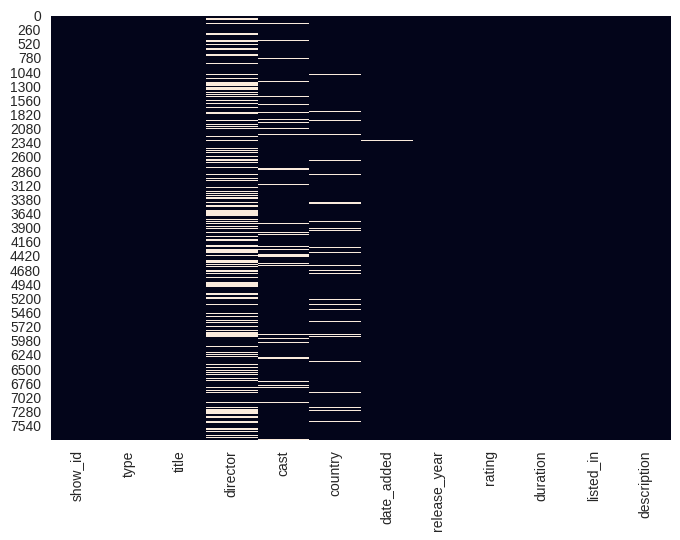

In [ ]:
# Visualizing the missing values
# Checking Null Value by Plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

* The Netflix dataset consists of tv shows and movies available on Netflix as of 2019.
* There are 7787 rows and 12 columns provided in the data.
* Null values are present in director, cast, country, date_added, and rating; Since there are only few null values present in date_added and rating (10 & 7 respectively) we will remove them from the data.
* No duplicate values exist.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# describe the data
df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

In [ ]:
# Dataset Describe (all columns included)
df.describe(include= 'all')

show_id   type                                    title  \
count     7787   7787                                     7787   
unique    7787      2                                     7787   
top      s7787  Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   
freq         1   5377                                        1   
mean       NaN    NaN                                      NaN   
std        NaN    NaN                                      NaN   
min        NaN    NaN                                      NaN   
25%        NaN    NaN                                      NaN   
50%        NaN    NaN                                      NaN   
75%        NaN    NaN                                      NaN   
max        NaN    NaN                                      NaN   

                      director                cast        country  \
count                     5398                7069           7280   
unique                    4049                6831            681   
top     Raúl Campos, Jan Suter  David Attenborough  United States   
freq                        18                  18           2555   
mean                       NaN                 NaN            NaN   
std                        NaN                 NaN            NaN   
min                        NaN                 NaN            NaN   
25%                        NaN                 NaN            NaN   
50%                        NaN                 NaN            NaN   
75%                        NaN                 NaN            NaN   
max                        NaN                 NaN            NaN   

             date_added  release_year rating  duration      listed_in  \
count              7777   7787.000000   7780      7787           7787   
unique             1565           NaN     14       216            492   
top     January 1, 2020           NaN  TV-MA  1 Season  Documentaries   
freq                118           NaN   2863      1608            334   
mean                NaN   2013.932580    NaN       NaN            NaN   
std                 NaN      8.757395    NaN       NaN            NaN   
min                 NaN   1925.000000    NaN       NaN            NaN   
25%                 NaN   2013.000000    NaN       NaN            NaN   
50%                 NaN   2017.000000    NaN       NaN            NaN   
75%                 NaN   2018.000000    NaN       NaN            NaN   
max                 NaN   2021.000000    NaN       NaN            NaN   

                                              description  
count                                                7787  
unique                                               7769  
top     Multiple women report their husbands as missin...  
freq                                                    3  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

### Variables Description

### <b> The dataset contains movies and tv shows information (show id, type, title, director, release year, rating, duration etc.).</b>


<b>Attribute Information : </b>

- **show_id**: Unique Id number for all the listed rows

- **type**: denotes type of show namely TV Show or Movie

- **title**: title of the movie

- **director**: Name of director/directors

- **cast**: lists the cast of the movie

- **country**: country of the production house

- **date_added**: the date the show was added

- **release_year**: year of the release of the show

- **rating**: show ratings

- **duration**: duration of the show

- **listed_in**: the genre of the show

- **description**: summary/ description of the movie


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in show_id is 7787
No. of unique values in type is 2
No. of unique values in title is 7787
No. of unique values in director is 4049
No. of unique values in cast is 6831
No. of unique values in country is 681
No. of unique values in date_added is 1565
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 492
No. of unique values in description is 7769


<Axes: xlabel='type', ylabel='count'>

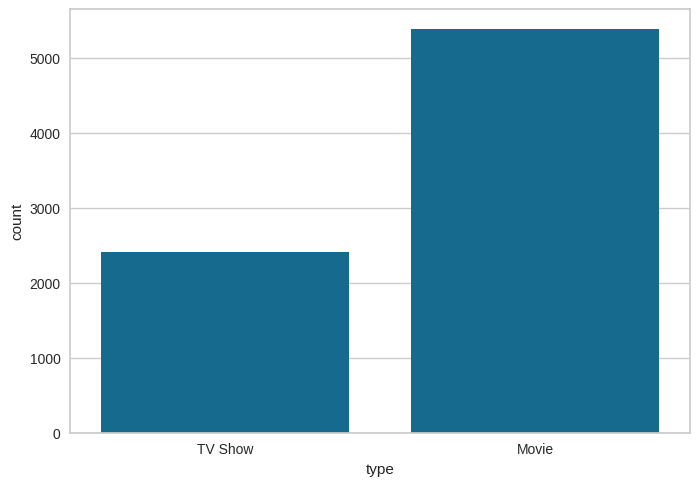

In [ ]:
sns.countplot(x='type', data=df)

## ***3. Data Wrangling***

### Data Wrangling Code

In [4]:
# Before doing any data wrangling lets create copy of the dataset
data = df.copy()

In [5]:
# Filling cast null values as not available
data['cast'] = data['cast'].fillna(value='Unknown')

In [6]:
# Filling contry null values as not known, the same can be replaced by mode of the country
data['country'] = data['country'].fillna(value='Not Known')
# data['country'] = data['country'].fillna(value=data['country'].mode())

In [7]:
# Since date_added and rating have less than 5% missing values, so let's stop them
data = data.dropna(subset=['date_added','rating'])

In [8]:
# Since director have 30% null values if we drop them, we will loss a lot data so replacing with "Unknown" will be better.
data['director'] = data['director'].fillna(value='Unknown')

In [9]:
# Checking missing values again for confirmation
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### What all manipulations have you done and insights you found?

To make the data analysis ready I have done the following:
1. Filled missing values of cast with "Unknown".
2. Filled missing values of country with "Not Known".
3. Dropped rows of date_added containing missing values.
4. Dropped rows of ratings containing missing values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Movies vs TV Shows Share

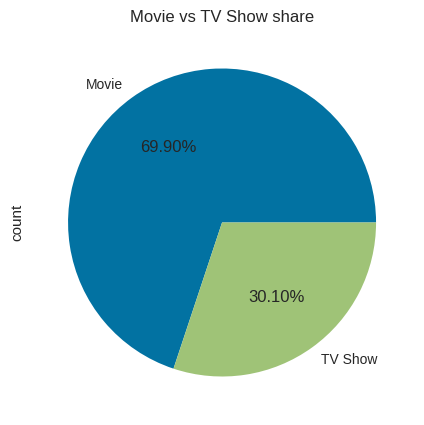

In [10]:
# Chart - 1 Pie Chart Visualization Code For Movie vs TV Show Share
spread = data['type'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%')
plt.title(f'Movie vs TV Show share')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a pie chart because it effectively illustrates the part-to-whole relationship in the data. A pie chart visually represents how individual categories contribute to the total, making it easy to understand and communicate percentage comparisons at a glance.

The use of distinct colors for each segment helps highlight the proportional contribution of each category. Since my goal was to compare different categories as parts of a whole — for example, the distribution of content types, genres, or countries — the pie chart was a natural choice. It provides a clear, intuitive way to present this information in a visually appealing and precise manner.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see that the types of content available on Netflix are unevenly distributed. A significant majority — 69.14% — of the titles are movies, while only 30.86% are TV shows. This highlights that, as of the data collected, Netflix's catalog leans heavily towards movies rather than TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights gained from the chart can certainly support positive business decisions. By understanding the distribution of content types (e.g., movies vs. TV shows), Netflix or similar platforms can:

Align content acquisition strategies — deciding whether to expand their library of TV shows or diversify their movie offerings.

Design targeted marketing campaigns — focusing on promoting content types that align with user preferences or market gaps.

Improve recommendations and personalization — by tailoring suggestions based on dominant content types consumed by specific demographics.

These actions can lead to increased viewer engagement, improved customer satisfaction, and ultimately higher retention rates.

**Insights that might signal negative growth:**

While the chart itself doesn’t directly indicate negative growth, it could highlight potential risks. For instance:

The heavy skew towards movies (69.14%) might signal underinvestment in TV shows, despite global trends showing rising demand for long-form, episodic content.

If Netflix fails to address this imbalance, it could lose market share to competitors offering richer TV show catalogs (e.g., Disney+, HBO).

* This emphasizes the need to not just observe trends, but to act on them to avoid stagnation or negative growth.

#### Chart - 2 : Distribution of Various Ratings

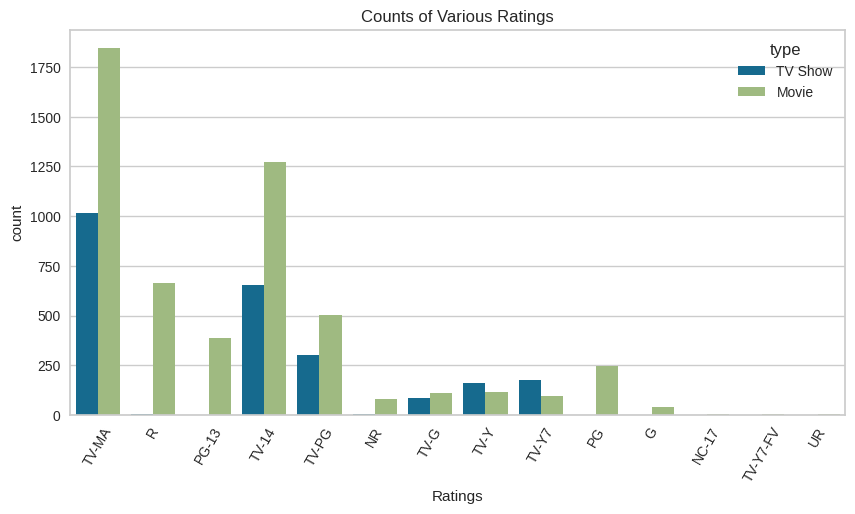

Each Rating Counts for Different Types of Shows:
rating    type   
G         Movie        39
NC-17     Movie         3
NR        Movie        79
          TV Show       4
PG        Movie       247
PG-13     Movie       386
R         Movie       663
          TV Show       2
TV-14     Movie      1272
          TV Show     656
TV-G      Movie       111
          TV Show      83
TV-MA     Movie      1845
          TV Show    1016
TV-PG     Movie       505
          TV Show     299
TV-Y      Movie       117
          TV Show     162
TV-Y7     Movie        95
          TV Show     175
TV-Y7-FV  Movie         5
          TV Show       1
UR        Movie         5
dtype: int64


In [ ]:
# Chart - 2 Count Plot Visualization Code for Various Ratings of Shows
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', hue='type', data=data)

# Set Labels
plt.title('Counts of Various Ratings')
plt.xlabel('Ratings')
plt.xticks(rotation = 60)

# Display Chart
plt.show()

# Printing The Counts of Each Rating for Different Type Shows
print('Each Rating Counts for Different Types of Shows:')
print(data.groupby(['rating', 'type']).size())

##### 1. Why did you pick the specific chart?

I chose a bar chart because it is well-suited for comparing the size or frequency of different categories within the dataset. Bar charts provide a clear visual comparison across groups, making it easy to identify which categories have higher or lower values at a glance.

They are also effective for displaying a large amount of categorical data in a compact, easy-to-read format. This makes bar charts ideal for showing distributions — such as the number of titles by country, director, or genre — and highlighting patterns or trends in the data.

##### 2. What is/are the insight(s) found from the chart?

From the count plot, we can clearly see that the most common rating among the titles is TV-MA, followed by TV-14. On the other hand, NC-17 appears as the least common rating in the dataset.

This suggests that Netflix’s catalog contains a large proportion of content aimed at mature audiences, while very few titles fall under the NC-17 category, which is generally restricted to adult-only audiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Each TV show and movie on Netflix is assigned a maturity rating to help members make informed choices for themselves and their families. Netflix determines these ratings based on the frequency and impact of mature content within a title. For TV shows, the rating reflects the overall maturity level of the entire series.

*From the chart, we observe the following:*

TV-MA tops the chart, indicating that a significant portion of Netflix’s catalog is geared toward mature audiences.

This is followed by TV-14 and TV-PG, which cater to teens and older children.

NC-17 rated titles are very rare, which is understandable since such content is strictly intended for adult audiences above 17 and is often subject to stricter distribution guidelines.

#### Chart - 3 : Top 10 Countries with Most Content

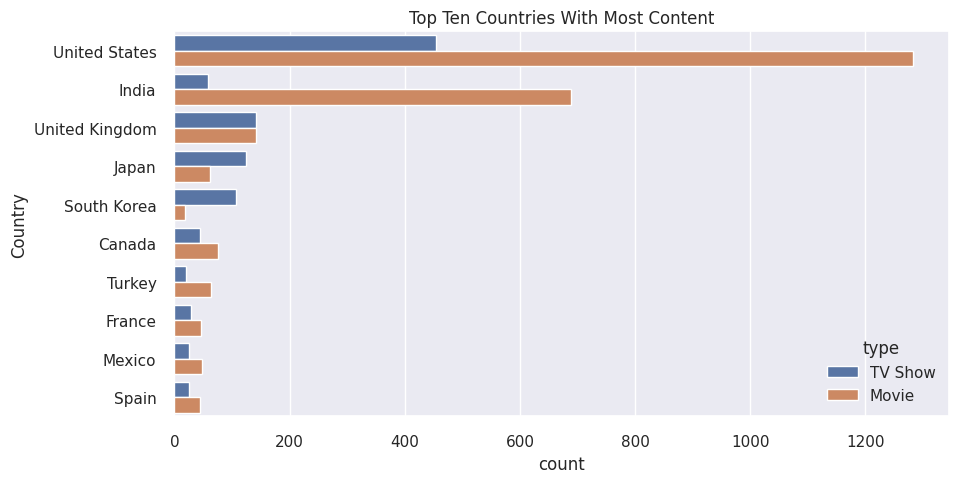

Number of Shows Produced by Top 10 Countries:
type     country       
Movie    United States     1282
         India              689
         United Kingdom     142
         Canada              76
         Turkey              63
         Japan               62
         Egypt               57
         Mexico              48
         France              46
         Philippines         46
TV Show  United States      455
         United Kingdom     142
         Japan              125
         South Korea        107
         India               58
         Taiwan              53
         Canada              45
         Australia           29
         France              28
         Spain               26
Name: count, dtype: int64


In [19]:
# Chart - 3 Count Plot Visualization Code for Content Produced by Different Countries
# Not Taking Unknown Countries
country_df = data[data['country'] != 'Not Known']

# Set Labels
plt.figure(figsize=(10, 5))
sns.countplot(y='country', hue='type', data=country_df, order=country_df.country.value_counts().iloc[:10].index)
plt.title('Top Ten Countries With Most Content')
plt.ylabel('Country')

# Display Chart
plt.show()

# Printing The Counts of Different Shows for Top 10 Countries
print('Number of Shows Produced by Top 10 Countries:')
print(country_df.groupby(['type']).country.value_counts().groupby(level=0, group_keys=False).head(10))

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the count plot, we found that the majority of Netflix content in the dataset comes from the United States, with a total of 2,546 titles — broken down as:

* 1,847 movies

* 699 TV shows

This is followed by India, contributing 923 titles, comprising:

* 852 movies

* 71 TV shows

This highlights that Netflix's catalog is heavily dominated by content produced in the United States, with India emerging as the second-largest contributor, primarily in the form of movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Positive business impact:**
The insights provide valuable guidance for content strategy and regional focus:

* The fact that the **United States** is the leading producer of both movies and TV shows aligns with Netflix’s origin as a US-based company and reinforces its strong domestic content pipeline.
* The significant contribution of **Indian movies** highlights the influence of **Bollywood** and confirms that Netflix’s Indian catalog is primarily film-focused. This insight can help Netflix further strengthen its regional strategy by investing in popular genres or exploring gaps in TV content for Indian audiences.
* The popularity of **TV shows from South Korea** supports the rise of the **K-Drama phenomenon**. Recognizing this trend can help Netflix continue to expand its K-Drama catalog to meet growing global demand.

These insights can drive **positive business impact** by helping Netflix:

* Tailor content acquisition strategies per region.
* Identify underserved markets or genres (e.g., Indian TV shows) for potential growth.
* Strengthen localization and marketing efforts.

---

**Potential risks / insights that could signal negative growth:**

* The heavy concentration of content from just a few countries (primarily the US and India) may lead to **limited diversity** in the catalog, potentially alienating audiences seeking more global or niche content.
* The **low number of Indian TV shows** could represent a missed opportunity, especially as streaming competitors focus on producing regional web series.
* Over-reliance on mature content (as seen in previous insights about ratings) might limit appeal to family-oriented or younger viewers in certain markets.


#### Chart - 4 : Content Released Over The Years

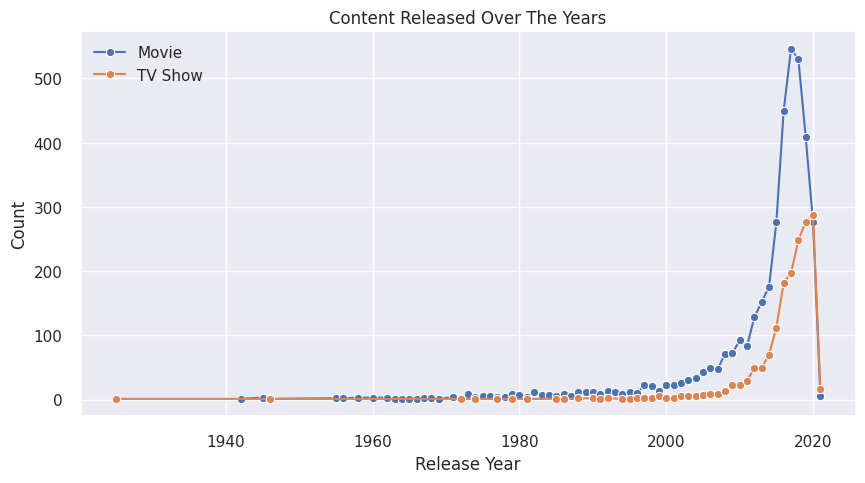

In [126]:
# Create New DataFrames for Movie and TV Show Release
release_year_df = data[['type','release_year']]
movie_year = release_year_df[release_year_df['type']=='Movie'].release_year.value_counts().to_frame().reset_index().rename(columns={'index':'year','release_year':'count'})
# Prepare data
release_year_df = df[['type', 'release_year']]

# Aggregate for movies
movie_year = (
    release_year_df[release_year_df['type'] == 'Movie']
    .groupby('release_year')
    .size()
    .reset_index(name='count')
    .sort_values('release_year')
)

# Aggregate for TV shows
show_year = (
    release_year_df[release_year_df['type'] == 'TV Show']
    .groupby('release_year')
    .size()
    .reset_index(name='count')
    .sort_values('release_year')
)

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=movie_year, x='release_year', y='count', marker='o', label='Movie')
sns.lineplot(data=show_year, x='release_year', y='count', marker='o', label='TV Show')

# Set Labels
plt.title('Content Released Over The Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend()

plt.show()

show_year = release_year_df[release_year_df['type']=='TV Show'].release_year.value_counts().to_frame().reset_index().rename(columns={'index':'year','release_year':'count'})

In [21]:
# Printing The Counts of Different Shows Released for Top 10 Years
print('Number of Shows Released in Each Year:')
print(data.groupby(['type']).release_year.value_counts().groupby(level=0, group_keys=False).head(10))

Number of Shows Released in Each Year:
type     release_year
Movie    2017            544
         2018            530
         2016            450
         2019            409
         2020            276
         2015            274
         2014            175
         2013            152
         2012            128
         2010             91
TV Show  2020            287
         2019            277
         2018            247
         2017            197
         2016            181
         2015            110
         2014             70
         2012             48
         2013             47
         2011             29
Name: count, dtype: int64


##### 1. Why did you pick the specific chart?

I chose a line plot because it is ideal for visualizing how values change over time. A line plot connects data points chronologically, making it easy to identify trends, patterns, and fluctuations across a time series.

In this case, a line plot is particularly useful because:

* It clearly shows how the release of content (both movies and TV shows) has varied over the years.

* It allows for an easy comparison of trends between multiple categories — in this case, movies vs. TV shows — on the same timeline.

* It highlights growth patterns, peaks, or declines at a glance, which is valuable for understanding Netflix’s content strategy over time.

Using a line plot here helps us effectively track and compare the release trends of different types of content across years.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most of the content on netflix has been released from 2010 to 2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above line plot, we observe the following key insights:

* The growth in the number of movies added to Netflix has been consistently higher than that of TV shows over the years.

* The majority of content available on Netflix was released between 2010 and 2020, marking this as the most significant decade for content expansion.

* The highest number of movies were released in 2017 and 2018, while TV shows peaked in 2019 and 2020, reflecting Netflix’s increasing investment in original series during that period.

* The line plot shows very few movies and TV shows released before 2010 or in 2021. The low count for 2021 is likely due to the dataset only capturing limited data from that year at the time of collection.



#### Chart - 5 : Content Added Over The Months

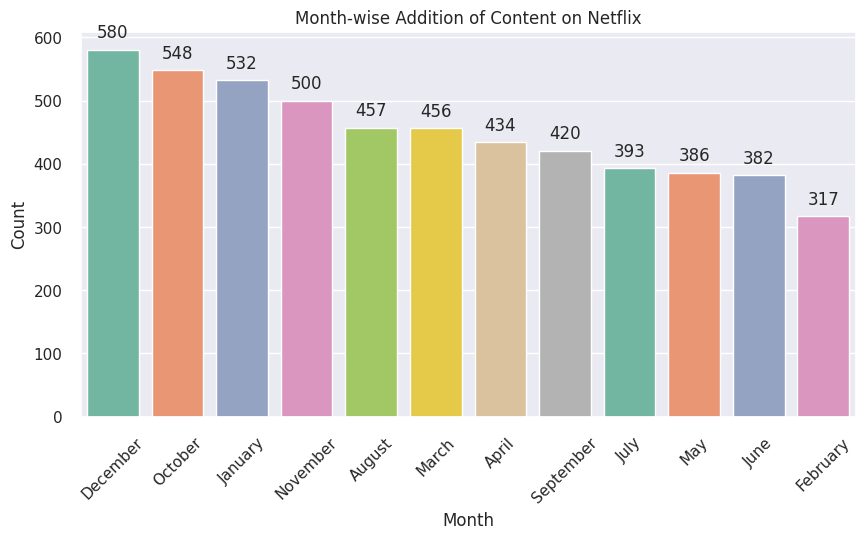

In [22]:
# Group data by month of 'date_added' and count
df['month'] = pd.to_datetime(df['date_added'], errors='coerce').dt.month_name()
months_df = (
    df['month']
    .value_counts()
    .rename_axis('month')
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)  # optional: or sort by calendar order if preferred
)

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=months_df, x='month', y='count', palette='Set2')

# Add annotations on top of bars
for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height())}',
                (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                ha='center', va='bottom',
                xytext=(0, 6), textcoords='offset points')

# Set labels
plt.title('Month-wise Addition of Content on Netflix')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # better readability if month names are long

plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the above graph, we observe that most of the content on Netflix tends to be added either at the beginning of the year or towards the end of the year.

This could reflect strategic decisions by Netflix to refresh or expand its catalog during these periods, possibly aligning with:

* New Year and holiday seasons when user engagement is higher.

* Start of financial or content cycles where licensing deals or new productions go live.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Positive business impact:**

From the above insight, we learned that **October, November, December, and January** are the months when a significant amount of content is added to Netflix.

This can help create a positive business impact because:

* These months coincide with the **holiday season and winter period**, when people are more likely to stay indoors and consume digital entertainment.
* Strategically adding fresh content during these high-engagement periods can increase **subscriber satisfaction, retention, and viewership hours**.
* Understanding this seasonal pattern allows Netflix to plan **marketing campaigns, feature promotions, and new releases** to maximize impact.

**Potential for negative growth:**

There is no direct indication of negative growth from this insight. However:

* **If content additions are concentrated only during these months**, there could be **slower growth or reduced user engagement** during other periods of the year. Subscribers may feel that there is less to watch mid-year, possibly impacting retention.
* To mitigate this, Netflix should aim for a **more balanced content addition strategy** throughout the year while still leveraging peak periods for major releases.


#### Chart - 6 : Duration Distribution for Netflix Movies

In [17]:
# Splitting Movie and Separating Values
df_movies = data[data['type']=='Movie'].copy()
df_movies.duration = df_movies.duration.str.replace(' min','').astype(int)

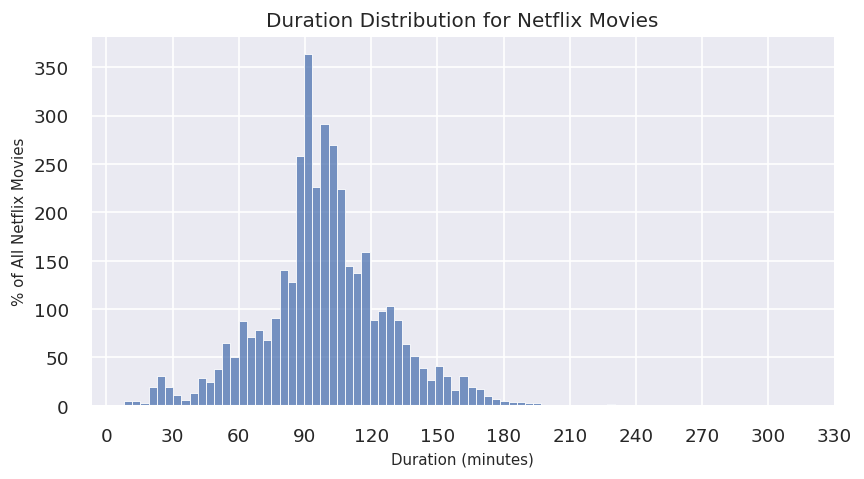

In [18]:
# Chart - 6 Histogram Visualization Code for Duration Distribution of Netflix Movies
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(df_movies.duration)
plt.xticks(np.arange(0,360,30))

# Set Labels
plt.title("Duration Distribution for Netflix Movies")
plt.ylabel("% of All Netflix Movies", fontsize=9)
plt.xlabel("Duration (minutes)", fontsize=9)

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histplot (histogram plot) because it is ideal for visualizing the distribution of a dataset. A histogram shows how frequently different ranges (or bins) of values occur, making it easy to:

- Understand the spread and shape of the data.

- Identify common durations where most movies fall.

- Detect any outliers or gaps in the distribution (e.g., unusually long or short movies).

Histograms are especially useful when dealing with large datasets (100+ observations), as they provide a clear summary of how the data is distributed across intervals.

In this case, using a histogram allowed me to analyze the duration distribution of Netflix movies and gain insight into typical movie lengths.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we observe that most Netflix movies have a duration between 90 and 120 minutes.

- This suggests that Netflix’s movie catalog mainly focuses on standard feature-length films, aligning with general audience expectations for movie length.

- It also indicates that movies longer than 2 hours or significantly shorter (e.g. under 60 minutes) are relatively rare on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact:**


From the above insight, we found that **most Netflix movies last between 90 and 120 minutes**, which aligns with standard feature-length expectations. This can create a positive business impact because:

* **User satisfaction:** Audiences generally expect movies to fall within this familiar duration, which helps keep them engaged without fatigue or dissatisfaction.
* **Content strategy:** Netflix can continue to prioritize producing or acquiring movies in this range to match viewer preferences, ensuring higher completion rates and sustained watch times.
* **Personalized recommendations:** Knowing the preferred duration helps in building better **recommendation systems** that suggest content matching user viewing habits.

**Potential for negative growth:**


There are no immediate insights from this data that point directly to negative growth. However:

* **Lack of variety:** If Netflix focuses too narrowly on movies within this duration range, it might miss opportunities to cater to niche audiences who prefer **short films, anthologies, or epic-length content**.
* **Global content expectations:** Different regions may have varied preferences for movie length, so relying only on this duration band might limit growth in certain markets.

**Justification:**

To avoid negative impact, Netflix should balance their catalog with a variety of durations to appeal to both mainstream and niche audiences globally.



#### Chart - 7 : Most Used Words in Shows Title

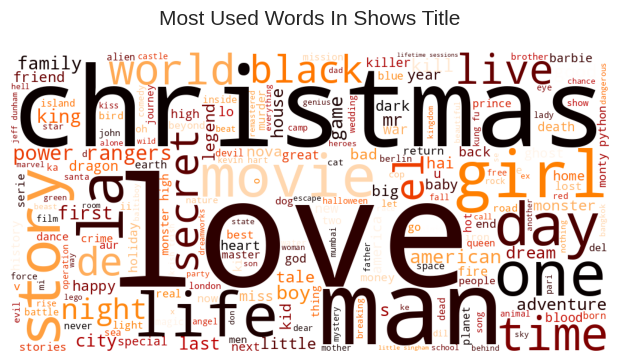

In [16]:
# Chart - 7 WordCloud Plot Visualization Code for Most Used Words in Netflix Shows Title
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in data.title:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Shows Title', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

I chose a **word cloud** because it is an effective visual tool for:

* **Highlighting the most frequent words or terms** in a dataset, making it easy to spot key themes at a glance.
* Offering a **quick visual summary of trends** without needing to read through large amounts of data.
* Helping readers **approach the subject from a fresh angle** and identify patterns that might not be obvious in a standard table or chart.

The word cloud supplements the textual data by emphasizing the **most common genres, titles, or keywords**, giving immediate insight into what dominates the dataset.


##### 2. What is/are the insight(s) found from the chart?

From the above **word cloud**, we observe that the most frequently occurring words in Netflix titles include **"Christmas"**, **"Love"**, **"World"**, **"Man"**, and **"Story"**.

This suggests that:

* **Festive themes** (e.g., Christmas) are very common in Netflix’s content catalog, possibly due to the popularity of holiday specials and seasonal releases.
* **Romantic themes** (e.g., Love) and **character-driven or human-centered narratives** (e.g., Man, Story) are also prominent, highlighting Netflix’s focus on emotional and relatable storytelling.
* **Global or universal themes** (e.g., World) appear frequently, reflecting content aimed at broad, diverse audiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact:**


From the insight, we observed that the most repeated words in Netflix titles include **“Christmas,” “Love,” “World,” “Man,” and “Story.”**
This can create a positive business impact because:

* The frequent occurrence of **"Christmas"** and related themes aligns with the trend that **most movies and TV shows are added during winter months**, tapping into seasonal demand and boosting viewership during holiday periods.
* Emphasis on **universal themes** like love, people, and global connections (**Love, Man, World, Story**) appeals to a wide audience, increasing content engagement across diverse markets.
* Netflix can use this information to strategically **plan seasonal content drops** and **promote thematic collections**, enhancing marketing campaigns.

**Potential for negative growth:**

* Over-reliance on certain themes (e.g., Christmas or romantic titles) could limit **genre diversity** and fail to capture audiences looking for other types of content (e.g., sci-fi, horror, documentaries).
* If viewers feel content is repetitive or formulaic, it could lead to **viewer fatigue**, potentially impacting long-term subscriber retention.

**Justification:**


While the insights mainly suggest positive strategies (e.g., aligning releases with seasonal trends, focusing on popular themes), Netflix should balance its catalog by **exploring underrepresented genres** and **off-season themes** to avoid over-saturation and appeal to varied tastes throughout the year.

#### Chart - 8 : Top 10 Genres on Netflix

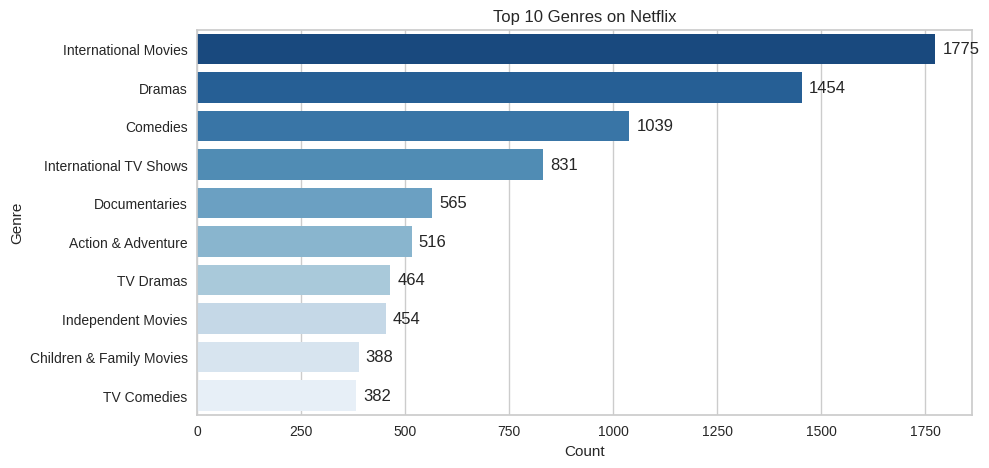

In [15]:
# Split genres and clean index
genres_df = (
    df['listed_in']
    .str.split(', ', expand=True)
    .stack()
    .reset_index(drop=True)
    .to_frame(name='genre')
)

# Plot
plt.figure(figsize=(10, 5))
g = sns.countplot(
    data=genres_df,
    y='genre',
    order=genres_df['genre'].value_counts().index[:10],
    palette='Blues_r'
)

# Add labels
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')

# Annotate bars
for p in g.patches:
    g.annotate(
        f'{int(p.get_width())}',
        (p.get_width(), p.get_y() + p.get_height() / 2),
        va='center',
        ha='left',
        xytext=(5, 0),
        textcoords='offset points'
    )

plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the above count plot of the top 10 genres on Netflix:

* **International Movies** is the most common genre on the platform, reflecting Netflix’s global content strategy and its appeal to diverse audiences worldwide.
* This is followed by **Dramas** and **Comedies**, which are traditionally popular genres that cater to a broad range of viewers.
* The presence of genres like **Documentaries**, **Action & Adventure**, and **Children & Family Movies** in the top 10 highlights Netflix’s effort to offer a wide variety of content for different age groups and interests.🚀


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above analysis, we can conclude:

* **International Movies** emerge as the most frequent genre on Netflix, surpassing even traditional categories like **Dramas** and **Comedies**.
* This highlights Netflix’s strategic focus on delivering global and culturally diverse content, not just prioritizing U.S.-centric productions despite the U.S. contributing the largest volume of overall content on the platform.
* The significant presence of international movies indicates Netflix’s effort to strengthen its global subscriber base and cater to regional tastes across different markets.

#### Chart - 9 : Top 10 Directors on Netflix

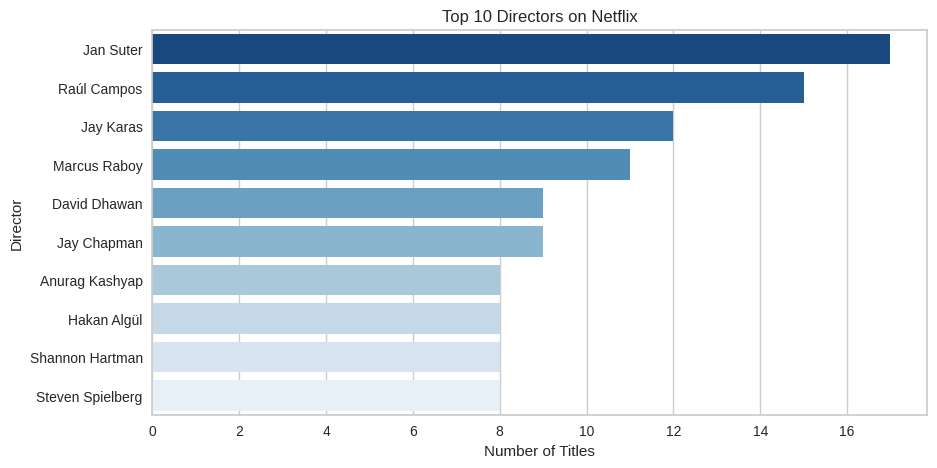

In [13]:
# Separate and stack directors properly
directors = (
    df[df['director'] != 'Unknown']
    .set_index('title')['director']
    .str.split(', ', expand=True)
    .stack()
    .reset_index(level=1, drop=True)
    .rename('director')
)

# Get top 10 directors and their counts
top_directors = directors.value_counts().head(10).reset_index()
top_directors.columns = ['director', 'count']

# Plot using barplot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_directors,
    y='director',
    x='count',
    palette='Blues_r'
)
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')

plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart because it is well-suited for comparing the frequency or size of different categories—in this case, directors with the most titles on Netflix. Bar charts are ideal when we want to highlight differences across categories clearly, and they can display a large amount of data efficiently in a small space. This helps quickly identify which directors contribute the most content to the platform.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we observe:

- Jan Suter is the most featured director on Netflix, followed by Raúl Campos and Marcus Raboy.

- The top 5 directors in terms of content volume are:
Jan Suter, Raúl Campos, Marcus Raboy, Jay Karas, and Cathy Garcia-Molina.

These directors have the highest number of movies or TV shows available on the platform, reflecting their strong presence in Netflix’s catalog.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

- Understanding which directors have the most titles allows Netflix to identify and strengthen partnerships with high-performing or high-output creators.

- The insight also shows that many top directors are from international markets. This aligns with Netflix's global strategy and helps the platform cater to diverse audiences, increasing subscriptions and viewer engagement worldwide.

**No evidence of negative growth from this insight:**

- There’s no direct indication that having these directors’ works on Netflix leads to negative growth.

- However, if Netflix relies too heavily on a small set of directors or regions without diversifying content styles and voices, it could limit appeal in certain markets. Regularly refreshing the director mix can help mitigate this risk.

**Justification:**


To sustain long-term positive growth, it’s important for Netflix to balance between trusted creators and new, emerging voices. This diversification will ensure continued innovation, satisfy varied audience preferences, and reduce over-dependence on any single group of creators.


#### Chart - 10 : Top 10 Actors on Netflix

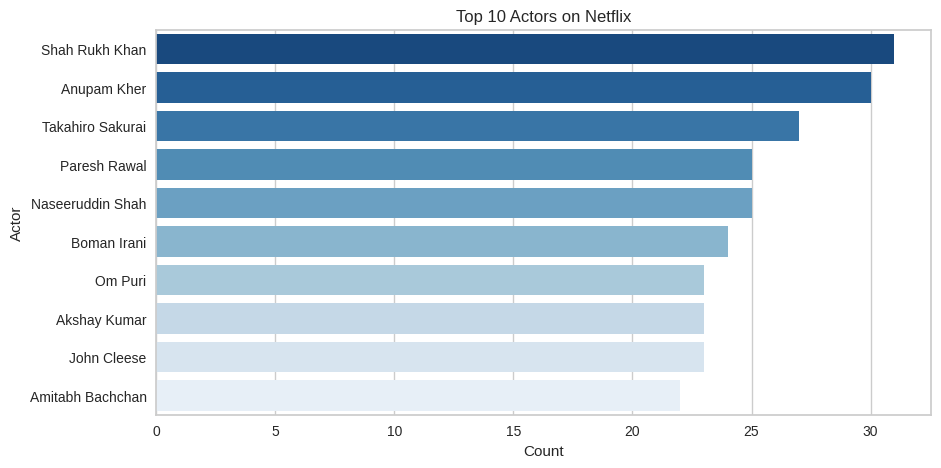

In [14]:
# Remove rows where 'cast' is missing or not available
actor_series = (
    df[df['cast'].notna()]
    .set_index('title')['cast']
    .str.split(', ', expand=True)
    .stack()
    .reset_index(level=1, drop=True)
)

# Get top 10 actors
top_actors = actor_series.value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    y=top_actors.index,
    x=top_actors.values,
    palette='Blues_r'
)
plt.title('Top 10 Actors on Netflix')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

 **Insight(s) found from the chart:**

From the above graph, we observe that the most popular actors with the highest number of titles on Netflix are **Anupam Kher**, **Shah Rukh Khan**, and **Naseeruddin Shah**, followed closely by **Om Puri** and **Takahiro Sakurai**. This suggests that Netflix features a significant number of titles involving leading actors from **Indian cinema** and **Japanese voice acting**, aligning with its strategy of offering diverse, international content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help create a **positive business impact** for Netflix:

* **Strengthening regional appeal**: The fact that actors like *Anupam Kher* and *Shah Rukh Khan* dominate the top list indicates that Netflix’s investment in Indian cinema aligns with strong regional demand. This can help Netflix **increase subscriptions** in India and among the global Indian diaspora.
* **Content strategy planning**: Netflix can identify what works well and **license or produce more content featuring these popular actors**, boosting viewer engagement.
* **Marketing opportunities**: Knowing which actors drive views helps Netflix design **targeted marketing campaigns**, improving return on marketing spend.

While no direct negative growth is indicated, there is a **potential risk**:

* **Over-dependence on a specific region or actor base**: If Netflix relies too heavily on content featuring a few actors from a single country (in this case, largely India), it might limit the **platform’s global appeal** or **alienate other markets** if diversity of offerings drops.
* **Viewer fatigue**: Excessive focus on certain actors might lead to *content fatigue*, where viewers feel they’re seeing the same faces or themes repeatedly.


####  *Justification*

These insights are useful because they highlight **successful partnerships** and **audience preferences** that Netflix can leverage for growth. However, to sustain long-term positive impact, Netflix should **balance its content strategy** — continuing to feature popular actors while also investing in **new talent and varied international content**.

#### Chart - 11 : Correlation Heatmap

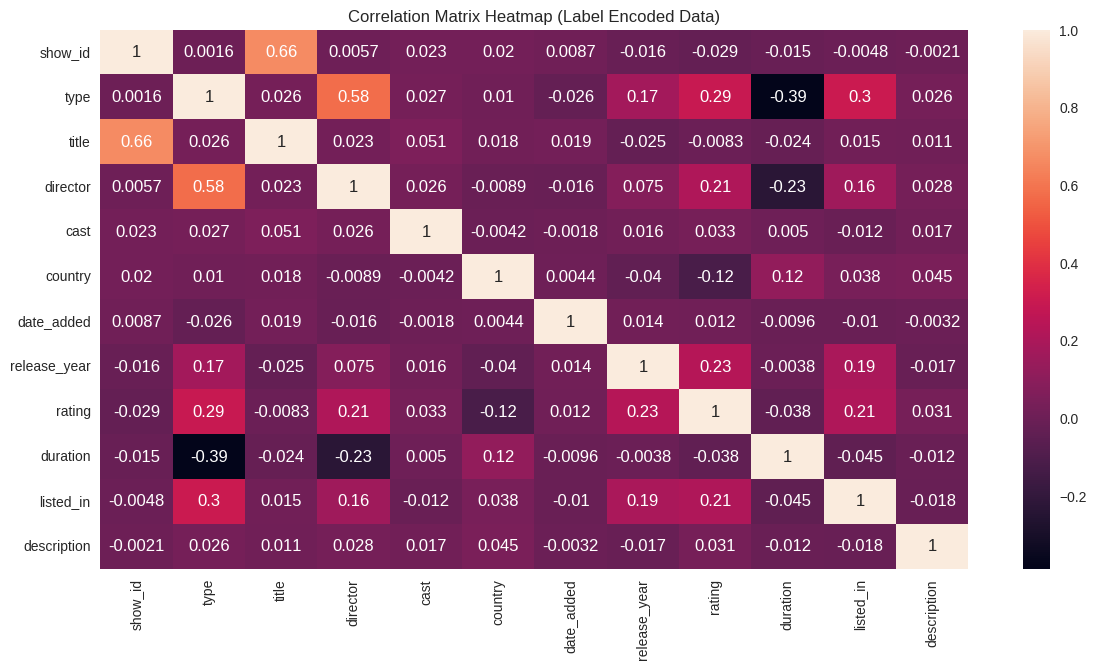

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoded_data = data.copy()

le = LabelEncoder()

for col in encoded_data.select_dtypes(include=['object']).columns:
    # Convert lists to string
    encoded_data[col] = encoded_data[col].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
    encoded_data[col] = encoded_data[col].fillna('Missing')
    encoded_data[col] = le.fit_transform(encoded_data[col])


# Compute correlation matrix
corr_matrix = encoded_data.corr()

# Plot heatmap
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix Heatmap (Label Encoded Data)')
plt.show()


##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From the correlation heatmap, we observe that there is generally low correlation between most of the label-encoded features, as expected due to their categorical nature. However, slight positive or negative correlations between type, listed_in, country, or duration could suggest weak associations (e.g., certain genres or types being more common in specific countries or having specific durations). These insights should be validated with more appropriate statistical measures for categorical data.



#### Chart - 12 : Pair Plot

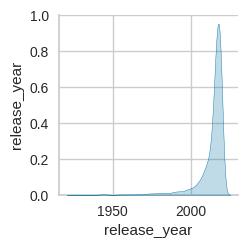

In [ ]:
# Pair Plot Visualization Code
sns.pairplot(data, diag_kind="kde", kind = 'reg')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that shows the pairwise relationships between numerical variables in a dataset. It is useful for exploring patterns, detecting correlations, identifying outliers, and spotting clusters. The pairplot provides both scatter plots (to see relationships between variables) and histograms (to see distributions) in a compact form.

I chose to use a pairplot to analyze potential patterns and relationships between features. It serves a similar purpose as a correlation matrix, but with the added advantage of providing a graphical, intuitive representation of these relationships.



##### 2. What is/are the insight(s) found from the chart?

Since there is only one value in dataframe of integer type, we are unable to visualize the pair plot.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on above chart experiments i have noticed that some variable of our netflix dataset does not seems to normally distributed so i have made hypothetical assumption that our data is normally distributed and for that i have decided to do statistical analysis.

1.   Average number of movies on Netflix in **United States** is greater than the average number of movies on Netflix in **India**.
2.   The number of **movies** available on Netflix is greater than the number of **TV shows** available on Netflix.

### Hypothetical Statement - 1

Average number of movies on Netflix in **United States** is greater than the average number of movies on Netflix in **India**.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Null hypothesis: $H_o : μ_{united states} = μ_{india}$

Alternate hypothesis: $H_1 : μ_{united states} \neq μ_{india}$

Test Type: Two-sample t-test

#### 2. Perform an appropriate statistical test.

In [23]:
# Perform Statistical Test to obtain P-Value
# Split the data into the 'united states' and 'india's' movie produced groups
us_movie_df = df_movies[df_movies.country == 'United States']
india_movie_df = df_movies[df_movies.country == 'India']

In [24]:
import scipy.stats as stats

contingency_table = pd.DataFrame({
    'Movies': [len(us_movie_df), len(india_movie_df)],
    'Non_Movies': [len(df[(df['country'] == 'United States') & (df['type'] != 'Movie')]),
                   len(df[(df['country'] == 'India') & (df['type'] != 'Movie')])]
}, index=['United States', 'India'])

print("Contingency Table:")
print(contingency_table)

# Run chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print result
if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject the null hypothesis.")
    print("➡ There is a significant association between country and content type (Movie/Non-Movie).")
else:
    print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject the null hypothesis.")
    print("➡ There is no significant association between country and content type (Movie/Non-Movie).")


Contingency Table:
               Movies  Non_Movies
United States    1282         461
India             689          58
Since p-value (1.253930222367161e-25) is less than 0.05, we reject the null hypothesis.
➡ There is a significant association between country and content type (Movie/Non-Movie).


##### Which statistical test have you done to obtain P-Value?

I have performed a Chi-Square Test of Independence (also called a Chi-Square Test for association) to obtain the p-value.

This test helps determine whether there is a significant association between two categorical variables — in this case:

- Country (United States vs India)

- Type of content (Movie vs Non-Movie / TV Show)

The chi-square test checks whether the distribution of content type is independent of the country or whether they are related in a statistically significant way.

##### Why did you choose the specific statistical test?

I selected the Chi-Square Test of Independence because:

- We are dealing with categorical data — country and type of content.

- We want to compare frequencies/counts across categories.

- The test is designed to evaluate whether differences in frequencies are due to chance or reflect a real association between variables.

### Hypothetical Statement - 2
The number of **movies** available on Netflix is greater than the number of **TV shows** available on Netflix.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: $H_o : μ_{movie} = μ_{tv show}$

Alternate hypothesis: $H_1 : μ_{movie} \neq μ_{tv show}$

Test Type: Two sample z-test

#### 2. Perform an appropriate statistical test.

In [25]:
# Perform Statistical Test to obtain P-Value
# Count the number of movies and TV shows in the DataFrame
n_movies = data[data['type'] == 'Movie'].count()['type']
n_tv_shows = data[data['type'] == 'TV Show'].count()['type']

In [26]:
# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]  # Number of movies and TV shows
nobs = [len(data), len(data)]  # Total number of observations in the DataFrame

# Perform a two sample z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('Z-statistic:', z_stat)
print('P-value:', p_val)
print()

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in number of 'movies' and 'TV shows' available on Netflix.")

Z-statistic: 41.585184809959024
P-value: 0.0

Since p-value (0.0) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.


##### Which statistical test have you done to obtain P-Value?

To compare the number of movies and TV shows available on Netflix, I conducted a two-sample z-test for proportions to obtain the p-value.

This test helps determine whether there is a statistically significant difference in the proportions of movies and TV shows available on the platform.

##### Why did you choose the specific statistical test?

I chose the two-sample z-test for proportions because:

- The data involves two categorical groups: movies and TV shows.

- We are comparing the proportions (percentages) of these categories within the total content on Netflix.

The z-test for proportions is appropriate when we want to check if the difference in proportions between two independent groups is statistically significant, especially when sample sizes are large enough for normal approximation.



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [127]:
# Handling Missing Values & Missing Value Imputation
data.isna().sum().sum()

np.int64(0)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Its already handled in data wrangling, so now there are no missing values to handle in the given dataset.

### 2. Handling Outliers
(Most of the columns are categorical, so no outliers observed)

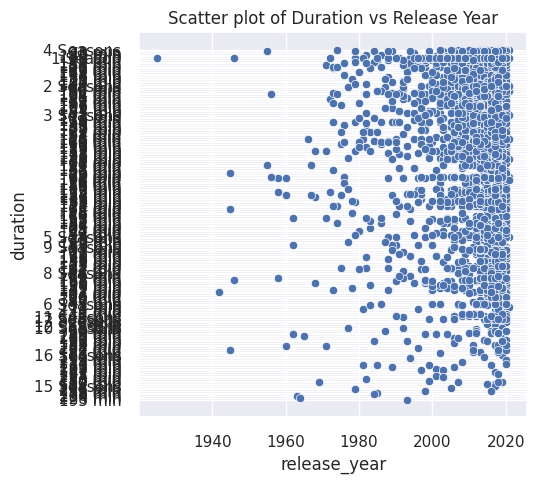

In [45]:
# Handling Outliers & Outlier treatments

sns.scatterplot(x=data['release_year'], y=data['duration'])
plt.title("Scatter plot of Duration vs Release Year")
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding
(No need as the data is categorical)

In [46]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [47]:
# Expand Contraction
# Create a new column called 'tags' in the DataFrame 'data'
# The purpose of this column is to store text data that will be used for model building
# The text data consists of the 'description', 'rating', 'country', 'listed_in' and 'cast' columns
data['tags'] = data['description'] + ' ' + data['rating'] + ' ' + data['country'] + ' ' + data['listed_in'] + ' ' + data['cast']

In [48]:
# Cross checking our result for the function created
print(data['tags'][0])

In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. TV-MA Brazil International TV Shows, TV Dramas, TV Sci-Fi & Fantasy João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi


#### 2. Lower Casing

In [49]:
# Lower Casing
# Define a function to convert text into lower cases
def to_lower(x):
  return x.lower()

# Apply the to_lower() function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(to_lower)

# Cross checking our result for the function created
print(data['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. tv-ma brazil international tv shows, tv dramas, tv sci-fi & fantasy joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi


#### 3. Removing Punctuations

In [50]:
# Remove Punctuations
# Define a function to remove punctuations from text
def remove_punctuation(text):
    '''a function for removing punctuation'''
    # Replace each punctuation mark with no space, effectively deleting it from the text
    translator = str.maketrans('', '', string.punctuation)
    text_without_punct = text.translate(translator)
    return text_without_punct

# Apply the remove_punctuation function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(remove_punctuation)

# Cross-check our result that the function worked as expected
print(data['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 4. Removing URLs & Removing words and digits contain digits.

In [51]:
# Remove URLs & Remove words and digits contain digits
# 'tags' column does not have any URLs so remove words and digits containing digits
data['tags'] = data['tags'].str.replace(r'\w*\d\w*', '', regex=True)

# Cross-check our result for the function created
print(data['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 5. Removing Stopwords & Removing White spaces

In [52]:
# Remove Stopwords
# Since the language is english, we need to import english stop words
stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(x):
  ''' function to remove stop words'''
  x = x.split()
  res = ''
  for word in x:
    if word not in stop_words:
      res = res + ' ' + word
  return res

# Apply the remove_stop_words function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(remove_stop_words)

# Cross-check our result for the function created
print(data['tags'][0])

 future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [54]:
# Remove White spaces in 'tags' column
data['tags'] = data['tags'].str.strip()

# Cross-check our result for the function created
print(data['tags'][0])

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 6. Rephrase Text
(Not required)

In [55]:
# Rephrase Text
# Rephrasing can be achived by the following code

# def rephrase_tags(x):
#     return x.replace('interesting', 'fascinating')
# data['tags'] = data['tags'].apply(rephrase_tags)

#### 7. Tokenization

In [56]:
# Tokenization
# Loading Libraries
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
# Apply the tokenization to the 'tags' column of the DataFrame
data['tags_tokens'] = data['tags'].astype(str).apply(lambda x: x.split())

# Cross-check our result that the function worked as expected
print(data['tags'][0])

# Store this list form of 'tags' column as 'temp_tags' for later POS tagging purpose
temp_tags = data['tags']

future elite inhabit island paradise far crowded slums get one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 8. Text Normalization

In [58]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Create an object of stemming function
stemmer = SnowballStemmer("english")

# Define a function to Normalize Text function
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

# Apply the stemming function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(stemming)

# Cross-check our result for the function created
print(data['tags'][0])

f u t u r e   e l i t e   i n h a b i t   i s l a n d   p a r a d i s e   f a r   c r o w d e d   s l u m s   g e t   o n e   c h a n c e   j o i n   s a v e d   s q u a l o r   t v m a   b r a z i l   i n t e r n a t i o n a l   t v   s h o w s   t v   d r a m a s   t v   s c i f i   f a n t a s y   j o ã o   m i g u e l   b i a n c a   c o m p a r a t o   m i c h e l   g o m e s   r o d o l f o   v a l e n t e   v a n e z a   o l i v e i r a   r a f a e l   l o z a n o   v i v i a n e   p o r t o   m e l   f r o n c k o w i a k   s e r g i o   m a m b e r t i   z e z é   m o t t a   c e l s o   f r a t e s c h i


##### Which text normalization technique have you used and why?

Here I have used **Stemming**, specifically the **SnowballStemmer** from NLTK.

**Why Stemming?**

Stemming is the process of reducing a word to its base or root form by removing suffixes and prefixes. The main purpose of stemming in Natural Language Processing (NLP) is to treat related words as the same during analysis — for example, mapping *caring*, *cared*, and *careful* to *care*. This reduces vocabulary size and helps in improving the efficiency of text processing tasks like search, classification, and clustering.

**Why SnowballStemmer?**

The **SnowballStemmer** (also known as the *Porter2 stemmer*) is an improvement over the original Porter stemmer. It provides:

* More accurate and consistent stemming.
* Support for multiple languages.
* Better handling of edge cases compared to simple rule-based stemmers.

In my project, I chose **SnowballStemmer** because it strikes a balance between simplicity and effectiveness for English text normalization.


#### 9. Part of speech tagging

In [59]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [60]:
import nltk

# Force redownload to ensure integrity
nltk.download('punkt', force=True)
nltk.download('punkt_tab', force=True)

nltk.data.path.append('/root/nltk_data')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [61]:
from nltk.tokenize import word_tokenize
print(word_tokenize("This is a test sentence."))


['This', 'is', 'a', 'test', 'sentence', '.']


In [63]:
import nltk
import ssl

# Fix SSL certificate issues (common in some environments)
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt', force=True)
nltk.download('averaged_perceptron_tagger', force=True)
nltk.download('tagsets_json', force=True)
nltk.download('tagsets', force=True)

print("All downloads completed!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets_json.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...


All downloads completed!


[nltk_data]   Unzipping help/tagsets.zip.


In [64]:
data['text_features'] = (
    data['type'].fillna('') + ' ' +
    data['title'].fillna('') + ' ' +
    data['director'].fillna('') + ' ' +
    data['cast'].fillna('') + ' ' +
    data['country'].fillna('') + ' ' +
    data['rating'].fillna('') + ' ' +
    data['listed_in'].fillna('') + ' ' +
    data['description'].fillna('')
)


In [65]:
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.9, min_df=5, max_features=1000)
tfidf_matrix = tfidf.fit_transform(data['text_features'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=data.index, columns=tfidf.get_feature_names_out())


In [66]:
# Create a function which gives true word (appropriate word) after pos tagging
def sentence(data):
  x=""
  for i in data:
    a=i[0]+' '
    x=x+a
  return x

# Apply the sentence function to the 'tags' column of the DataFrame
data['tags']=data['tags'].apply(sentence)

# Cross-check our result for the function created
print(data['tags'][0])

f   u   t   u   r   e       e   l   i   t   e       i   n   h   a   b   i   t       i   s   l   a   n   d       p   a   r   a   d   i   s   e       f   a   r       c   r   o   w   d   e   d       s   l   u   m   s       g   e   t       o   n   e       c   h   a   n   c   e       j   o   i   n       s   a   v   e   d       s   q   u   a   l   o   r       t   v   m   a       b   r   a   z   i   l       i   n   t   e   r   n   a   t   i   o   n   a   l       t   v       s   h   o   w   s       t   v       d   r   a   m   a   s       t   v       s   c   i   f   i       f   a   n   t   a   s   y       j   o   ã   o       m   i   g   u   e   l       b   i   a   n   c   a       c   o   m   p   a   r   a   t   o       m   i   c   h   e   l       g   o   m   e   s       r   o   d   o   l   f   o       v   a   l   e   n   t   e       v   a   n   e   z   a       o   l   i   v   e   i   r   a       r   a   f   a   e   l       l   o   z   a   n   o       v   i   v   i   a   n   e       p   o   r   

#### 10. Text Vectorization

In [67]:
# Fit and transform at once
tfidf_matrix = tfidf.fit_transform(data['text_features'])

# Convert to array for clustering
vector = tfidf_matrix.toarray()

# Print summary
print(vector)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [68]:
print(tfidf.get_feature_names_out())

['13' '13 action' '13 comedies' '13 dramas' '14' '14 action' '14 anime'
 '14 comedies' '14 crime' '14 documentaries' '14 dramas'
 '14 international' '14 tv' 'aaron' 'accident' 'action' 'action adventure'
 'actor' 'adam' 'adventure' 'adventure anime' 'adventure comedies'
 'adventure dramas' 'adventure international' 'adventure tv' 'adventures'
 'africa' 'age' 'agent' 'ahmed' 'ai' 'akshay' 'al' 'alan' 'alejandro'
 'alex' 'alexander' 'ali' 'alice' 'alien' 'allen' 'amanda' 'ambitious'
 'america' 'american' 'amid' 'amy' 'ana' 'anand' 'anderson' 'andrea'
 'andrew' 'andy' 'angeles' 'anime' 'anime features' 'anime series' 'ann'
 'anna' 'anne' 'anthony' 'antonio' 'anupam' 'argentina' 'argentina tv'
 'arjun' 'army' 'art' 'artist' 'ashley' 'aspiring' 'australia'
 'australia tv' 'away' 'baby' 'bachchan' 'bad' 'baker' 'band' 'based'
 'battle' 'beautiful' 'begin' 'begins' 'belgium' 'bell' 'beloved' 'ben'
 'benjamin' 'best' 'best friend' 'big' 'billy' 'black' 'bo' 'bob' 'bobby'
 'bond' 'boss' 'boy' '

In [69]:
vec_data=pd.DataFrame(vector)
vec_data

0         1    2         3         4    5    6    7    8    \
0     0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
1     0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
2     0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
3     0.173943  0.229271  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
4     0.187726  0.000000  0.0  0.256927  0.000000  0.0  0.0  0.0  0.0   
...        ...       ...  ...       ...       ...  ...  ...  ...  ...   
5456  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
5457  0.000000  0.000000  0.0  0.000000  0.124396  0.0  0.0  0.0  0.0   
5458  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
5459  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
5460  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   

           9    ...       990  991  992  993  994  995  996  997  998  999  
0     0.000000  ...  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.000000  ...  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2     0.000000  ...  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.000000  ...  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4     0.000000  ...  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...        ...  ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
5456  0.000000  ...  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5457  0.248571  ...  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5458  0.000000  ...  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5459  0.000000  ...  0.303373  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5460  0.000000  ...  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5461 rows x 1000 columns]

##### Which text vectorization technique have you used and why?

I have used TF-IDF (Term Frequency-Inverse Document Frequency) for vectorization.

TF-IDF is a numerical statistic that reflects how important a word is to a document in a collection or corpus.
It combines two measures:

- Term Frequency (TF) — how frequently a term occurs in a document.

- Inverse Document Frequency (IDF) — how rare or unique a term is across all documents.

This helps balance common words that may appear often but aren’t useful for distinguishing between documents.



### 6. Data Transformation
(No need to transform this data because this data is in form of Text Vectorization)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [70]:
# Transform Your data

### 7. Data Scaling
(Here the units of whole data are same so no need to do scaling)
Here the units of whole data are same so no need to do scaling"

TF-IDF vectors → They are already normalized (each row’s values represent relative importance within the document, and are scaled between 0 and 1 or similarly bounded).


##### Which method have you used to scale you data and why?

### 8. Dimensionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction is needed.

**Reasons:**

- **Reduces model complexity:**
When working with high-dimensional data (such as text data transformed using TF-IDF or CountVectorizer), many features may contribute little or no useful information. Removing these helps simplify the model.

- **Removes noise:**
Dimensionality reduction helps eliminate irrelevant or redundant features that can act as noise, which improves the model’s ability to generalize.

- **Mitigates overfitting:**
With too many features, the model might learn patterns specific to the training data, leading to overfitting. Reducing dimensions helps prevent this.

- **Improves computation time and memory usage:**
Models train faster and require fewer resources when working with fewer, more meaningful features.

- **Helps with visualization:**
Dimensionality reduction techniques like PCA (Principal Component Analysis) or t-SNE can project high-dimensional data into 2D or 3D, making it easier to visualize patterns and clusters.

In [73]:
# SVD (Single Value Decomposition)

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=32)
vector_reduced = svd.fit_transform(vector)

print(f"Original shape: {vector.shape}")
print(f"Reduced shape: {vector_reduced.shape}")


Original shape: (5461, 1000)
Reduced shape: (5461, 100)


In [75]:
# Plot cumulative explained variance
plt.figure(figsize=(12, 5))
plt.plot(np.cumsum(svd.explained_variance_ratio_), marker='o')

# Set labels
plt.title('Truncated SVD - Cumulative Explained Variance vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

target_variance = 0.8  # threshold value
plt.axhline(y=target_variance, color='red', linestyle='--', label=f'{int(target_variance * 100)}% variance')

# For highlighting a specific x (e.g. where 80% is achieved), compute it dynamically:
cum_var = np.cumsum(svd.explained_variance_ratio_)
n_comp_80 = np.argmax(cum_var >= target_variance) + 1
plt.axvline(x=n_comp_80, color='green', linestyle='--', label=f'{n_comp_80} components')

plt.legend()

# Display chart
plt.show()


In [77]:
# Using Truncated SVD for dimensionality reduction of sparse data
svd = TruncatedSVD(n_components=300, random_state=32)
vector_reduced = svd.fit_transform(vector)

print(f"Reduced shape: {vector_reduced.shape}")

Reduced shape: (5461, 300)


In [78]:
# Transformed features
X = svd.transform(vector)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We can use Truncated SVD (Singular Value Decomposition) to reduce the dimensionality of data.

Because of the versatility and interpretability of SVD, it has been shown to be effective in a wide variety of contexts and disciplines, especially for sparse and high-dimensional data such as text represented by TF-IDF matrices. Given any high-dimensional sparse dataset, we can start with SVD in order to visualize the relationship between points, understand the main variance in the data, and identify the intrinsic dimensionality.

Certainly, SVD is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into sparse high-dimensional data where methods like PCA may be computationally inefficient.

### 9. Data Splitting


In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Data splitting is not required in this case because we are not performing a supervised learning task where we would predict a target variable (e.g., classification or regression). Our focus is on unsupervised learning tasks like clustering, dimensionality reduction (SVD/PCA), and text vectorization (TF-IDF), where the goal is to explore, transform, or group the data rather than make predictions on unseen data.

### 10. Handling Imbalanced Dataset


##### Do you think the dataset is imbalanced? Explain Why.

In this case, the dataset does **not appear to be imbalanced** in a way that would require special handling. An imbalanced dataset typically refers to situations where the target classes (in classification tasks) are distributed very unevenly — for example, where one class dominates the majority of samples and others are rare (e.g., 95% of class A, 5% of class B).

Since our task focuses on unsupervised learning (e.g., clustering, dimensionality reduction on text data) or general analysis of Netflix data rather than predicting a target class, the concept of class imbalance is **not directly applicable**. There is no classification target for which imbalance would negatively affect model training.

However, if we were to create a supervised task later (e.g., predicting content rating or type), we would need to examine the class distribution of that target carefully to determine if imbalance handling techniques like oversampling, undersampling, or synthetic data generation are needed.

In [80]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 : K-Means Clustering (For Metric Distortion)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11), k=(3, 12),
                 locate_elbow=False, timings=False)

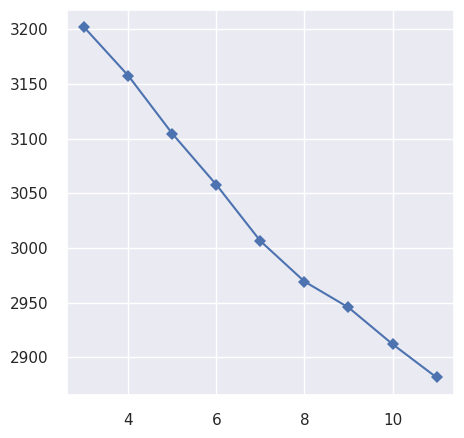

In [79]:
# ML Model - 1 Implementation
# Finding optimal number of clusters using the elbow method

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12), metric='distortion', timings=False, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(X)

From this plot, we can say that the best k value is 6. Because, after this point the distortion/inertia is start decreasing in a linear fashion.

In [81]:
# Instantiate the K-Means clustering model where number of clusters is 6
kmean=KMeans(n_clusters=6)

# Fit the data to the KMean cluster
kmean.fit(X)

# Predict on the model
y_kmean=kmean.predict(X)

Labelling the dataset as per the cluster.

In [82]:
# Adding a new column 'K_mean_cluster' in the dataset
data["K_mean_cluster"]=y_kmean
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                                tags  \
0  f   u   t   u   r   e       e   l   i   t   e ...   
1  d   e   v   a   s   t   a   t   i   n   g     ...   
2  a   r   m   y       r   e   c   r   u   i   t ...   
3  p   o   s   t   a   p   o   c   a   l   y   p ...   
4  b   r   i   l   l   i   a   n   t       g   r ...   

                                         tags_tokens  \
0  [future, elite, inhabit, island, paradise, far...   
1  [devastating, earthquake, hits, mexico, city, ...   
2  [army, recruit, found, dead, fellow, soldiers,...   
3  [postapocalyptic, world, ragdoll, robots, hide...   
4  [brilliant, group, students, become, cardcount...   

                                       text_features  K_mean_cluster  
0  TV Show 3% Unknown João Miguel, Bianca Compara...               1  
1  Movie 7:19 Jorge Michel Grau Demián Bichir, Hé...               0  
2  Movie 23:59 Gilbert Chan Tedd Chan, Stella Chu...               5  
3  Movie 9 Shane Acker Elijah Wood, John C. Reill...               5  
4  Movie 21 Robert Luketic Jim Sturgess, Kevin Sp...               5

In [ ]:
# Getting unique labels
u_labels = np.unique(y_kmean)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X[y_kmean == i , 0] ,X[y_kmean == i , 1] , label = i)
plt.title('Clusters for K-Means Clustering')
plt.legend()

# Display Chart
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [83]:
# Visualizing evaluation Metric Score chart

# Second chart (Scatter plot Graph) shows the result of our algorithm. We can see that cluster wise data distribution in this chart

### Here I used K-Means Clustering.

K-Means is a **centroid-based clustering algorithm** that partitions data into *K* clusters, where *K* is a user-defined number of clusters. The goal is to group data points so that points in the same cluster are more similar to each other (in terms of distance to the cluster’s centroid) than to points in other clusters.

### How K-Means Works:

1. **Initialize K centroids randomly**

* These centroids can be randomly selected data points or random positions in the feature space.

2. **Assign each data point to the nearest centroid**

* The distance is typically measured using **Euclidean distance** (though others like cosine distance can be used for text data).

3. **Recompute centroids**

* After assigning points, the centroids are recalculated as the mean of the data points assigned to each cluster.

4. **Repeat the assignment and update steps**

* This process continues until centroids stop changing significantly (convergence), or until a maximum number of iterations is reached.

---

### Why K-Means?

* **Efficient on large datasets** (computationally faster than hierarchical clustering)
* Provides **clear and interpretable centroids** that represent the average feature profile of each cluster.
* Scales well to higher-dimensional data, especially after dimensionality reduction (e.g., using SVD).


#### 2. Cross- Validation & Hyperparameter Tuning

In [84]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# First chart gives the optimal number of clusters. We get this chart by validation and basis of some rules

##### Which hyperparameter optimization technique have you used and why?

Here I have used the **Elbow Method** to determine the optimal number of clusters (K) for K-Means clustering.

The **Elbow Method** is a graphical technique that helps in selecting the best K by analyzing the *Within-Cluster Sum of Squares (WCSS)* — which is the sum of squared distances between each data point and its assigned cluster centroid.

**How it works**:

* We plot WCSS against various values of K.
* As K increases, WCSS decreases because points are closer to centroids.
* However, beyond a certain point, the improvement in WCSS slows down — this point is called the *elbow*.
* The location of the elbow indicates the optimal K, balancing cluster compactness and simplicity.

In summary, the elbow point represents where adding more clusters provides diminishing returns in terms of explaining the variance in the data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we can not directly predict the number of cluster. After using Elbow method we can get optimal number of clusters and we can implement it directly.

### ML Model - 2 : Hierarchical Clustering (Agglomerative Clustering)

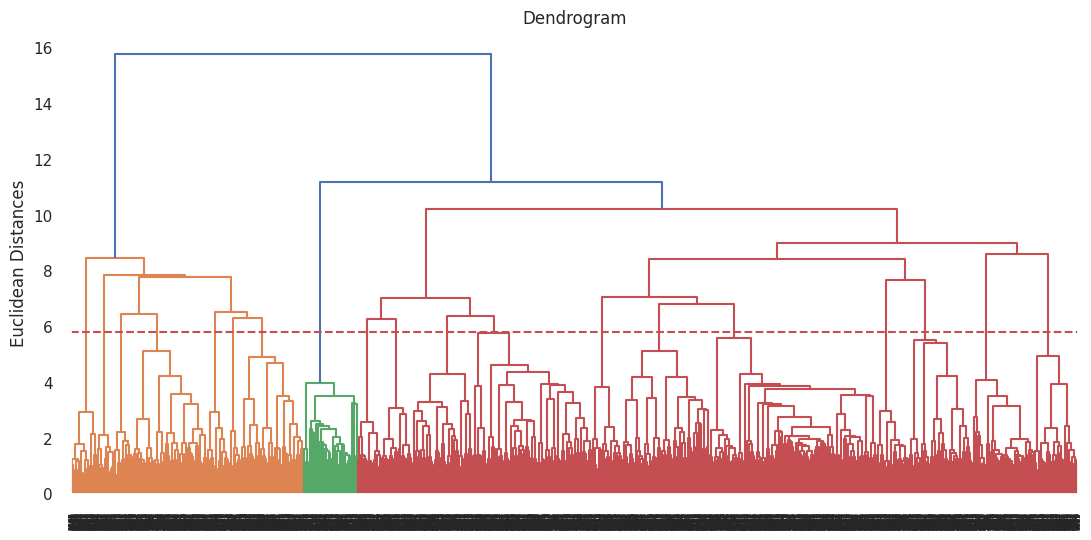

In [85]:
# ML Model - 2 Implementation
# Using the dendrogram to find the optimal number of clusters

# Instantiate the dendogram
plt.figure(figsize=(13,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Set labels
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.axhline(y=5.8, color='r', linestyle='--')

# Display Chart
plt.show()

From this graph we can say that optimal number of clusters is 6.

In [87]:
from sklearn.cluster import AgglomerativeClustering

# Instantiate the Agglomerative clustering model
aggh = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')

# Fit the data to the Agglomerative cluster
y_hc = aggh.fit_predict(X)


In [88]:
# Adding a new column 'Agg_cluster' in the dataset
data["Agg_cluster"]=y_hc
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                                tags  \
0  f   u   t   u   r   e       e   l   i   t   e ...   
1  d   e   v   a   s   t   a   t   i   n   g     ...   
2  a   r   m   y       r   e   c   r   u   i   t ...   
3  p   o   s   t   a   p   o   c   a   l   y   p ...   
4  b   r   i   l   l   i   a   n   t       g   r ...   

                                         tags_tokens  \
0  [future, elite, inhabit, island, paradise, far...   
1  [devastating, earthquake, hits, mexico, city, ...   
2  [army, recruit, found, dead, fellow, soldiers,...   
3  [postapocalyptic, world, ragdoll, robots, hide...   
4  [brilliant, group, students, become, cardcount...   

                                       text_features  K_mean_cluster  \
0  TV Show 3% Unknown João Miguel, Bianca Compara...               1   
1  Movie 7:19 Jorge Michel Grau Demián Bichir, Hé...               0   
2  Movie 23:59 Gilbert Chan Tedd Chan, Stella Chu...               5   
3  Movie 9 Shane Acker Elijah Wood, John C. Reill...               5   
4  Movie 21 Robert Luketic Jim Sturgess, Kevin Sp...               5   

   Agg_cluster  
0            1  
1            1  
2            3  
3            1  
4            1

In [89]:
# Getting unique labels
u_labels = np.unique(y_hc)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X[y_hc == i , 0] ,X[y_hc == i , 1] , label = i)
plt.title('Clusters for Agglomerative Clustering')
plt.legend()

# Display Chart
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Second chart (Scatter plot Graph) shows the performance of our algorithm. Here we can see the different clusters

Here I have used Agglomerative Clustering.

Agglomerative Clustering is a type of hierarchical clustering algorithm. It is an unsupervised machine learning technique that divides the population into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar.

Agglomerative Hierarchical Clustering (AHC) is an iterative classification method whose principle is simple.

(1) The process starts by calculating the dissimilarity between the N objects.

(2) Then two objects which when clustered together minimize a given agglomeration criterion, are clustered together thus creating a class comprising these two objects.

(3) Then the dissimilarity between this class and the N-2 other objects is calculated using the agglomeration criterion. The two objects or classes of objects whose clustering together minimizes the agglomeration criterion are then clustered together.

This process continues until all the objects have been clustered.

#### 2. Cross- Validation & Hyperparameter Tuning

In [90]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Example param grid
param_grid = {
    'n_clusters': list(range(2, 11)),   # Try 2 to 10 clusters
    'init': ['k-means++', 'random'],
    'max_iter': [300, 500, 1000]
}

best_score = -1
best_params = {}

# Random-like search (or can convert to GridSearch by iterating all combinations)
for n in param_grid['n_clusters']:
    for init in param_grid['init']:
        for max_iter in param_grid['max_iter']:
            kmeans = KMeans(n_clusters=n, init=init, max_iter=max_iter, random_state=42)
            labels = kmeans.fit_predict(X)   # X is the vectorized data

            # Calculate silhouette score
            score = silhouette_score(X, labels)
            print(f"n_clusters={n}, init={init}, max_iter={max_iter}, silhouette={score:.4f}")

            if score > best_score:
                best_score = score
                best_params = {'n_clusters': n, 'init': init, 'max_iter': max_iter}

print("\n Best params:", best_params)
print("Best silhouette score:", best_score)


n_clusters=2, init=k-means++, max_iter=300, silhouette=0.0406
n_clusters=2, init=k-means++, max_iter=500, silhouette=0.0406
n_clusters=2, init=k-means++, max_iter=1000, silhouette=0.0406
n_clusters=2, init=random, max_iter=300, silhouette=0.0406
n_clusters=2, init=random, max_iter=500, silhouette=0.0406
n_clusters=2, init=random, max_iter=1000, silhouette=0.0406
n_clusters=3, init=k-means++, max_iter=300, silhouette=0.0446
n_clusters=3, init=k-means++, max_iter=500, silhouette=0.0446
n_clusters=3, init=k-means++, max_iter=1000, silhouette=0.0446
n_clusters=3, init=random, max_iter=300, silhouette=0.0446
n_clusters=3, init=random, max_iter=500, silhouette=0.0446
n_clusters=3, init=random, max_iter=1000, silhouette=0.0446
n_clusters=4, init=k-means++, max_iter=300, silhouette=0.0354
n_clusters=4, init=k-means++, max_iter=500, silhouette=0.0354
n_clusters=4, init=k-means++, max_iter=1000, silhouette=0.0354
n_clusters=4, init=random, max_iter=300, silhouette=0.0510
n_clusters=4, init=rando

##### Which hyperparameter optimization technique have you used and why?

I have use Dendrogram for optimal number of clusters.

A dendrogram is a branching diagram that represents the relationships of similarity among a group of entities. Each branch is called a clade. There is no limit to the number of leaves in a clade.

A dendrogram is a diagram that shows the attribute distances between each pair of sequentially merged classes. To avoid crossing lines, the diagram is graphically arranged so that members of each pair of classes to be merged are neighbors in the diagram. The Dendrogram tool uses a hierarchical clustering algorithm.

A dendrogram is a tree-structured graph used in heat maps to visualize the result of a hierarchical clustering calculation. The result of a clustering is presented either as the distance or the similarity between the clustered rows or columns depending on the selected distance measure.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we get optimal number of cluster is 6.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Here we cannot directly predict the number of cluster . After plotting dendrogram chart we can get optimal number of clusters and we can implement it directly in the data.

### ML Model - 3 : Silhouette Score for Clustering

In [91]:
# ML Model - 3 Implementation
# Finding optimal number of clusters using the Silhouette Score
for n_clusters in range(2,15):
  km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
  km.fit(X)
  preds = km.predict(X)
  centers = km.cluster_centers_
  score = silhouette_score(X, preds, metric='euclidean')
  print ("For n_clusters = %d, silhouette score is %0.4f"%(n_clusters, score))

For n_clusters = 2, silhouette score is 0.0406
For n_clusters = 3, silhouette score is 0.0446
For n_clusters = 4, silhouette score is 0.0431
For n_clusters = 5, silhouette score is 0.0390
For n_clusters = 6, silhouette score is 0.0390
For n_clusters = 7, silhouette score is 0.0397
For n_clusters = 8, silhouette score is 0.0440
For n_clusters = 9, silhouette score is 0.0464
For n_clusters = 10, silhouette score is 0.0441
For n_clusters = 11, silhouette score is 0.0487
For n_clusters = 12, silhouette score is 0.0537
For n_clusters = 13, silhouette score is 0.0585
For n_clusters = 14, silhouette score is 0.0590


From this chart we can say that optimal number of cluster is 5. Because the silhouette score is highest for the cluster 5.

For n_clusters = 2, silhouette score is 0.04061110289018253


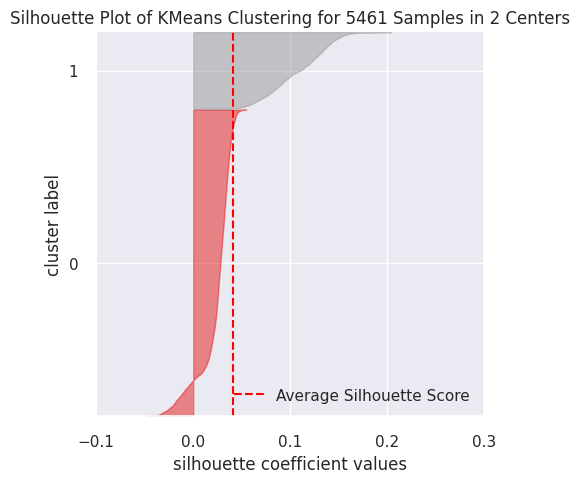

For n_clusters = 3, silhouette score is 0.04464463998471762


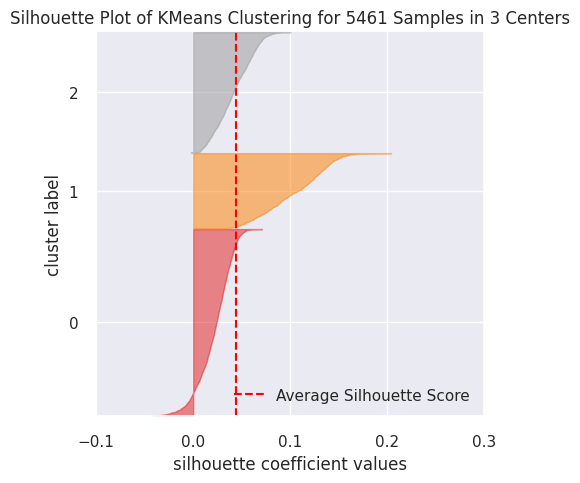

For n_clusters = 4, silhouette score is 0.0430854745330718


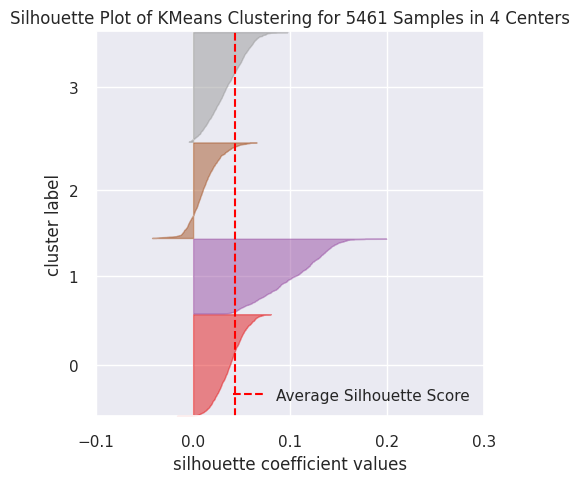

For n_clusters = 5, silhouette score is 0.0390374613904785


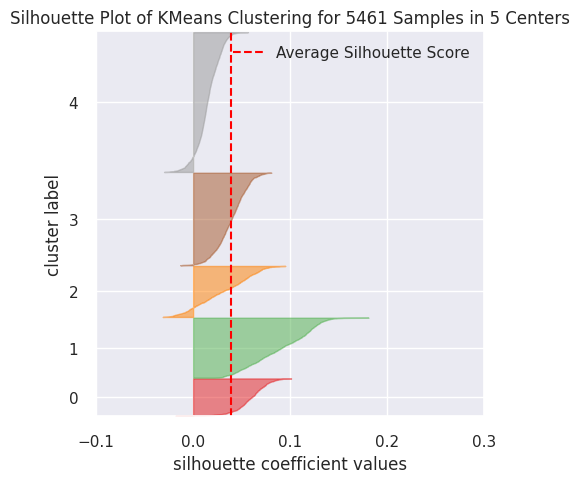

For n_clusters = 6, silhouette score is 0.03903275993454018


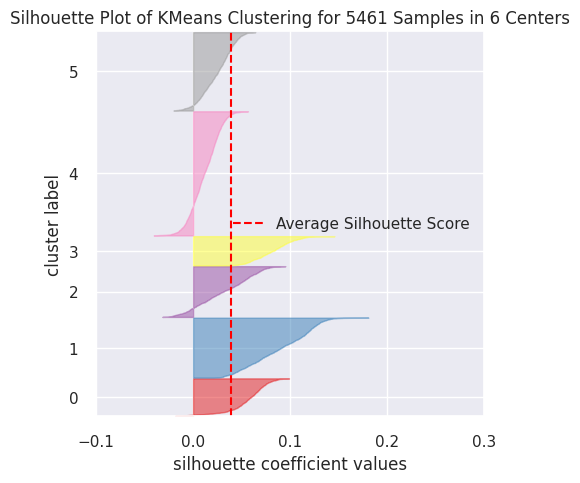

For n_clusters = 7, silhouette score is 0.039748232609994244


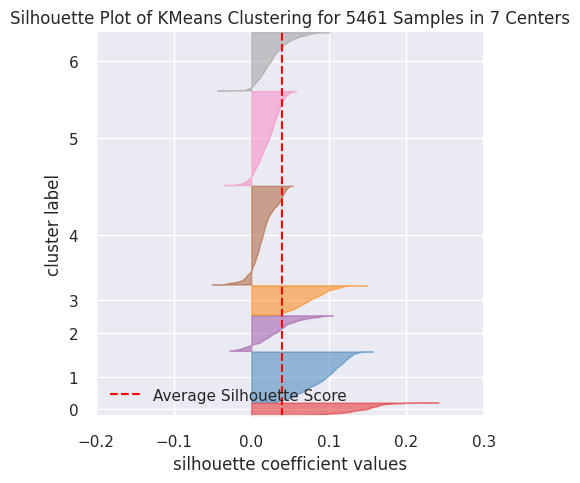

For n_clusters = 8, silhouette score is 0.044007425795538506


For n_clusters = 9, silhouette score is 0.04641162478393641


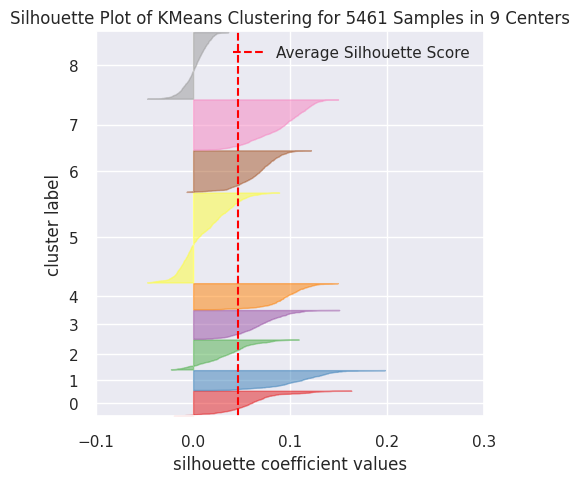

For n_clusters = 10, silhouette score is 0.04410610076704148


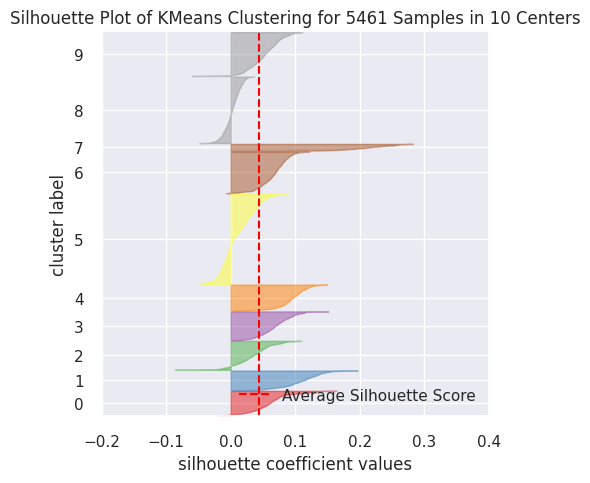

For n_clusters = 11, silhouette score is 0.048727192516150736


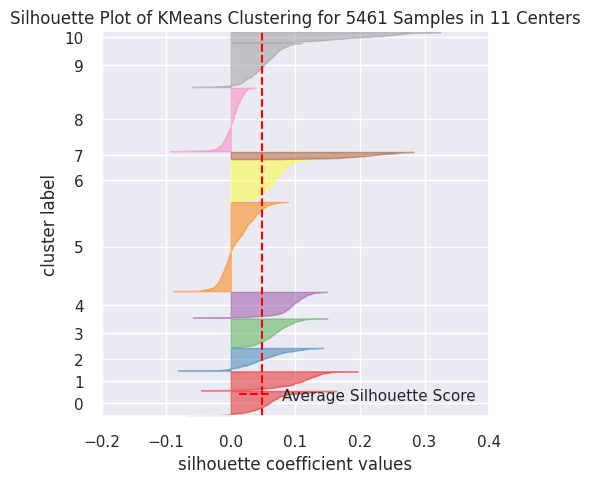

For n_clusters = 12, silhouette score is 0.05365957163482749


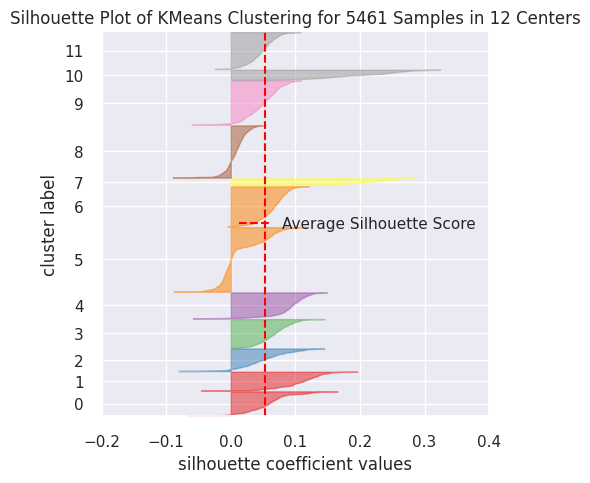

For n_clusters = 13, silhouette score is 0.05850858589763064


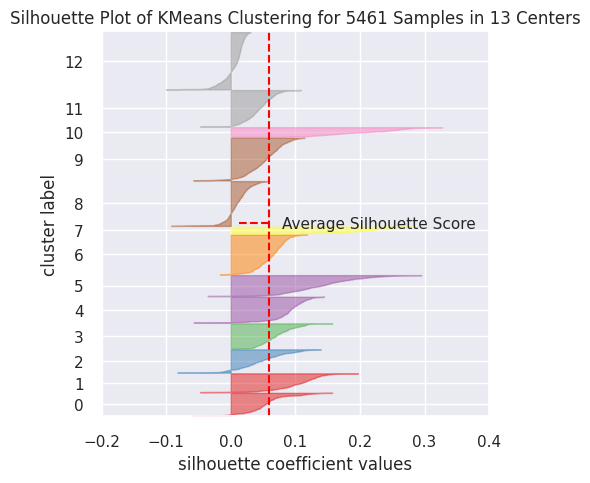

For n_clusters = 14, silhouette score is 0.05904148646409747


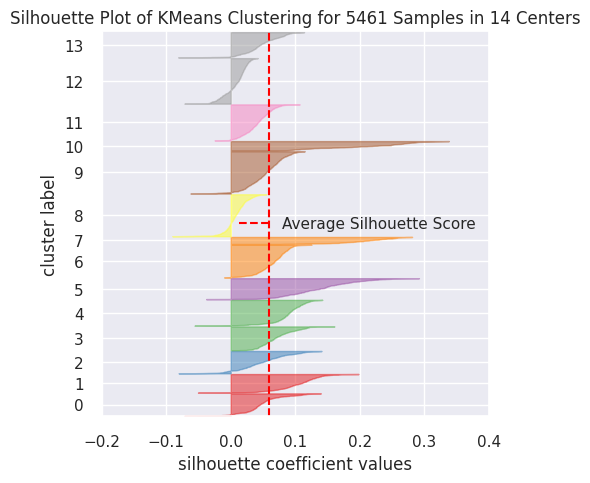

In [92]:
# Generate Silhouette Plots for Each Clusters
# Instantiate the clustering model and visualizer
for n_clusters in range(2,15):
    km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
    km.fit(X)
    preds = km.predict(X)
    centers = km.cluster_centers_

    # Set parameters and labels
    score = silhouette_score(X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(X) # Fit the training data to the visualizer
    visualizer.poof() # Draw/show/poof the data

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Here we define the number of clusters basis on the Silhouette Cofficient

Number of cluster is defined by Silhouette Coefficient.

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

**1:** Means clusters are well apart from each other and clearly distinguished.

**0:** Means clusters are indifferent, or we can say that the distance between clusters is not significant.

**-1:** Means clusters are assigned in the wrong way.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# We decided the number of clusters basis on the some rules and analysis of the graph

##### Which hyperparameter optimization technique have you used and why?

Here we got Silhouette Coefficient for optimal number of clusters. From this data we got optimal number of clusters is 5 because it has a higher Silhouette Coefficient.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we cannot directly predict the number of cluster . After using this method we can get optimal number of clusters and we can implement it directly in data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Silhouette score is the best evaluation metric for optimization the number of clusters.

The optimal number of cluster gives us the lightness and transparency of the business.

Through cluster we can find out which type of customers are in our data.

This evaluation metric makes business decision easier. Getting the Silhouette score is very easy.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the charts we can see that K-Mean Clustering model is best model for our data.

Here we get optimal number of clusters is 6, but often the number of clusters is already determined within the business. If the number of clusters within a business is already determined, we can apply the algorithm well.

Within the K-Mean Cluster graph we can see that the clusters are well divided.

Through this cluster we can know what type of data is in which cluster.

The goal of this problems may be to discover groups of similar examples within the data.

The primary function of this algorithm is to perform segmentation, whether it is store, product, or customer. Customers and products can be clustered into hierarchical groups based on different attributes.

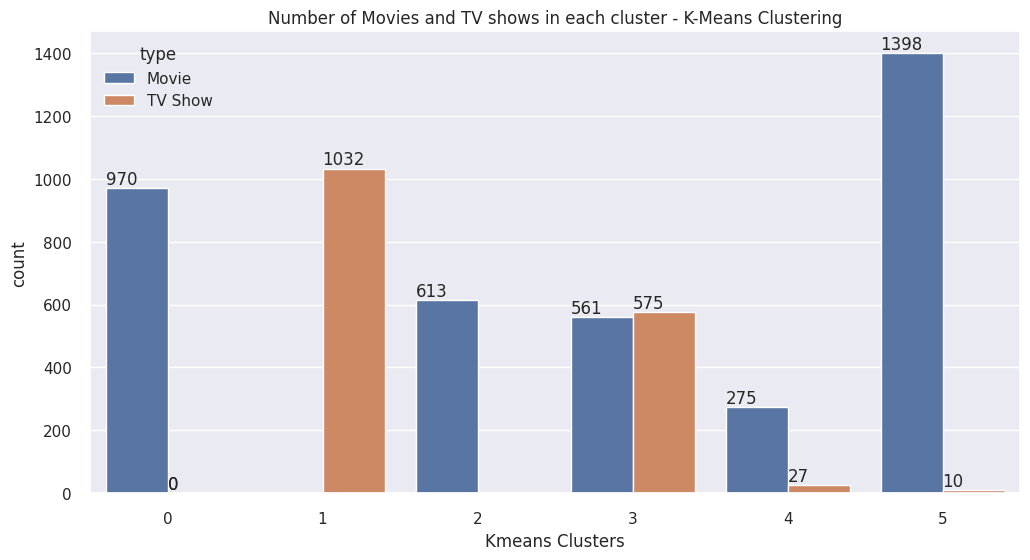

In [94]:
# Count Plot Visualization Code for number of movies and tv shows in each cluster
# Set labels
plt.figure(figsize=(12,6))
graph = sns.countplot(x='K_mean_cluster',data=data, hue='type')
plt.title('Number of Movies and TV shows in each cluster - K-Means Clustering')
plt.xlabel('Kmeans Clusters')

# Adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()), xytext = (0,3), textcoords = 'offset points')

Let's do Cluster Analysis....................
*  Clustering similar content by matching text-based features

In [95]:
# WordCloud Plot Visualization Code for User Rating Review
# Define a Function for Clustering Similar Content by Matching Text-Based Features
def kmeans_worldcloud(cluster_num):

 # Create a String to Store All The Words
  comment_words = ''

  # Remove The Stopwords
  stopwords = set(STOPWORDS)

  # Iterate Through The Column
  for val in data[data['K_mean_cluster']==cluster_num].tags.values:

      # Typecaste Each Val to String
      val = str(val)

      # Split The Value
      tokens = val.split()

      # Converts Each Token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  # Set Parameters
  wordcloud = WordCloud(width = 1000, height = 500,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10,
                  max_words = 1000,
                  colormap = 'gist_heat_r').generate(comment_words)

  # Set Labels
  plt.figure(figsize = (6,6), facecolor = None)
  plt.title(f'Most Important Words In Cluster {cluster_num}', fontsize = 15, pad=20)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  # Display Chart
  plt.show()

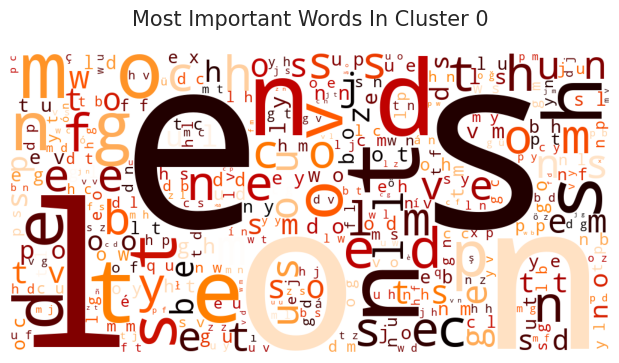

In [96]:
# WordCloud for cluster 0
kmeans_worldcloud(0)

**Keywords observed in cluster 0: united states, documentaries, international movies etc.**

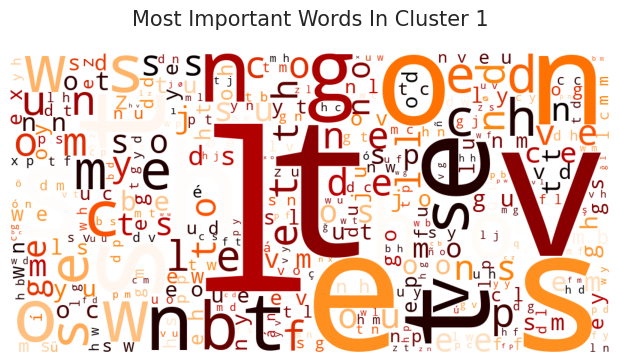

In [97]:
# WordCloud for cluster 1
kmeans_worldcloud(1)

**Keywords observed in cluster 1: action adventure, united states, international movies etc.**

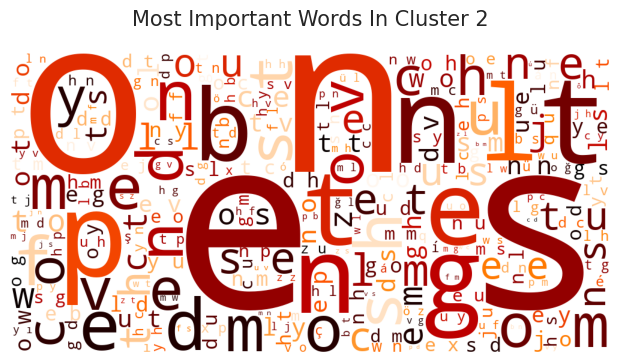

In [98]:
# WordCloud for cluster 2
kmeans_worldcloud(2)

**Keywords observed in cluster 2: united states, standup comedy, comedian, tv etc.**

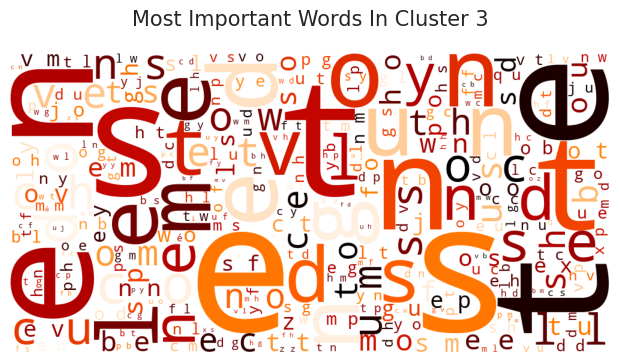

In [99]:
# WordCloud for cluster 3
kmeans_worldcloud(3)

**Keywords observed in cluster 3: international tv, tv show, drama, crime tv etc.**

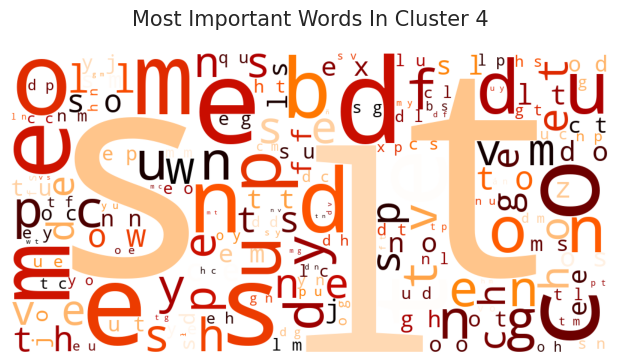

In [100]:
# WordCloud for cluster 4
kmeans_worldcloud(4)

**Keywords observed in cluster 4: international movies, drama, comedies, romantic etc.**

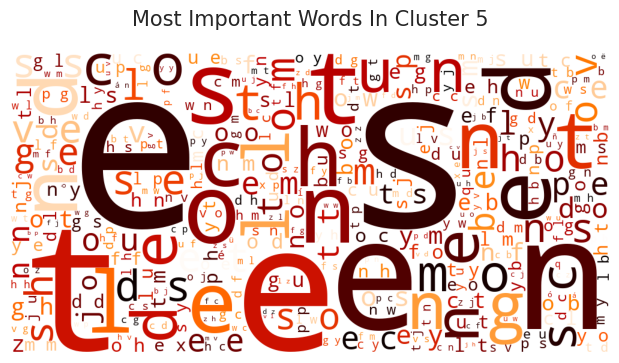

In [101]:
# WordCloud for cluster 5
kmeans_worldcloud(5)

**Keywords observed in cluster 5: united states, children, family, dramas, independent movies etc.**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [102]:
# Here i have use topic modeling instead of feature importance and model explainability.
# Model explainability does majory help in classification problem but here is the project of unsupervised ML.
# In topic modeling, we can get topic wise feature importance.

Here I have use topic modeling. Assume that the clusters are topics. Here for topic modelling I have used CountVectorizer process for Vectorization of data and I have used Latent Dirichlet Allocation for building a topic.

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
document_term_matrix = count_vectorizer.fit_transform(data['text_features'])
print("Shape of document-term matrix:", document_term_matrix.shape)


Shape of document-term matrix: (5461, 40747)


In [107]:
# LDA model

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=6)
lda.fit_transform(document_term_matrix)

array([[0.00271591, 0.83478994, 0.00270882, 0.15438098, 0.00270398,
        0.00270037],
       [0.22718242, 0.75853786, 0.00356944, 0.00357671, 0.00357412,
        0.00355945],
       [0.75710967, 0.00323865, 0.22994593, 0.00322338, 0.00326033,
        0.00322204],
       ...,
       [0.97671738, 0.00466233, 0.00464606, 0.00466897, 0.00464899,
        0.00465626],
       [0.20054177, 0.78083637, 0.0046478 , 0.00467985, 0.00465039,
        0.00464381],
       [0.98005561, 0.00399434, 0.00398256, 0.00400307, 0.00398265,
        0.00398176]])

In [108]:
# Most Important Features for Each Topic
vocab = count_vectorizer.get_feature_names_out()

for i, comp in enumerate(lda.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
tv the united and states 

Topic 1: 
movies movie to tv the 

Topic 2: 
tv international movies to the 

Topic 3: 
tv shows unknown show the 

Topic 4: 
movie and tv his up 

Topic 5: 
movie to the united movies 



In [109]:
# Generate WordCloud Images for Given Topics
# Define a Function for Visualize Most Important Features for Each Topic
def draw_word_cloud(topic_num):

  # Create a String to Store All The Words
  imp_words_topic=""

  # Set Parameters
  comp=lda.components_[topic_num]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:25]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  # Set Parameters
  wordcloud = WordCloud(width = 1000, height = 500,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10,
                  max_words = 1000,
                  colormap = 'gist_heat_r').generate(imp_words_topic)

  # Set Labels
  plt.figure(figsize = (6,6), facecolor = None)
  plt.title(f'Most Important Features in Topic {topic_num}', fontsize = 15, pad=20)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  #Display Chart
  plt.show()

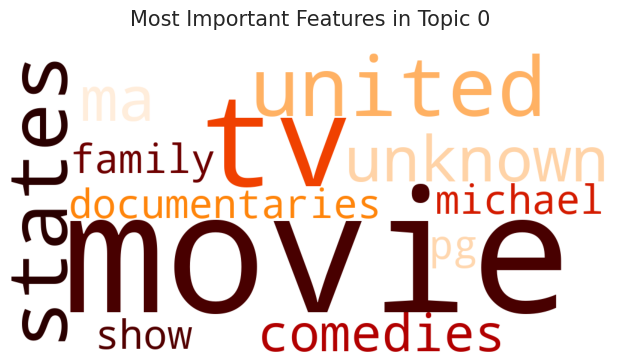

In [110]:
# WordCloud for Topic 0
draw_word_cloud(0)

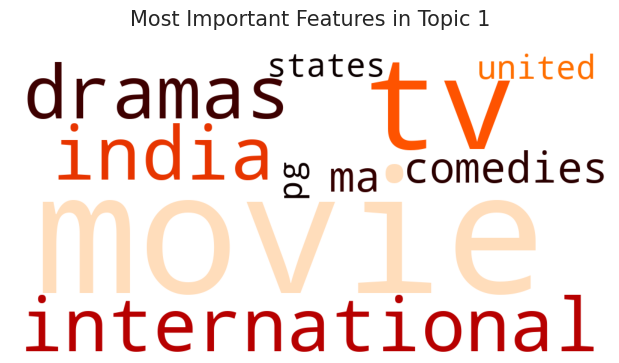

In [111]:
# WordCloud for Topic 1
draw_word_cloud(1)

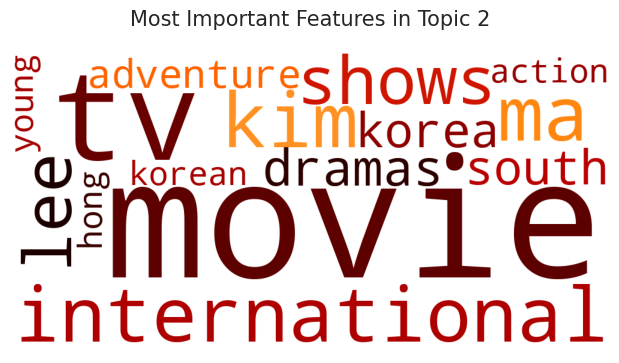

In [112]:
# WordCloud for Topic 2
draw_word_cloud(2)

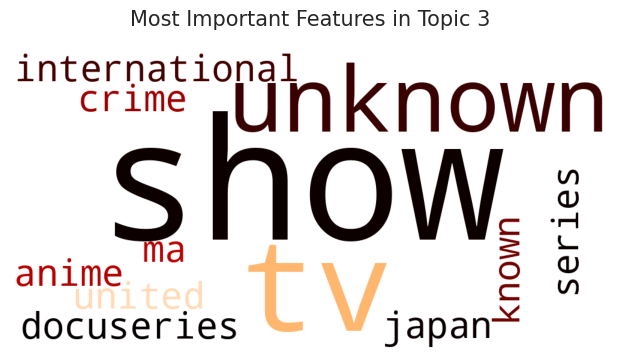

In [113]:
# WordCloud for Topic 3
draw_word_cloud(3)

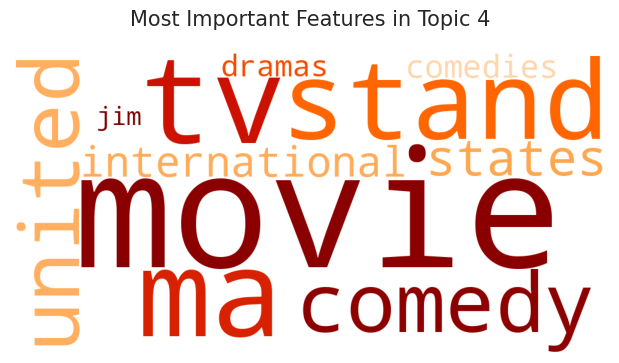

In [114]:
# WordCloud for Topic 4
draw_word_cloud(4)

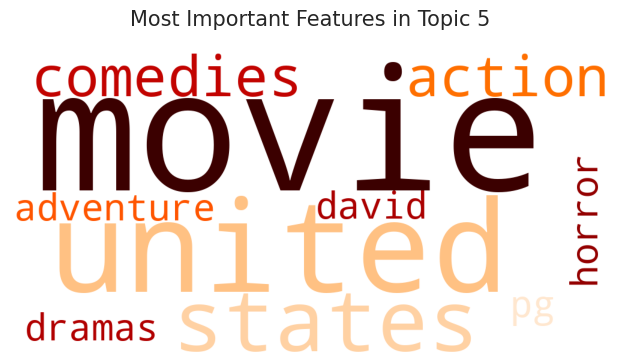

In [115]:
# WordCloud for Topic 5
draw_word_cloud(5)

Here from those wordcloud plots we can know which word is important for which cluster. We can also decide the name of Topics (Clusters) from this plots.

## ***8. Content Based Recommender System***

In [116]:
# Defining a new dataframe for building a recommender system
recommender_df = data.copy()

# Resetting index
recommender_df.reset_index(inplace=True)

# Dropping show-id and index column
recommender_df = recommender_df.drop(columns=['index', 'show_id'])

In [117]:
# Calculate cosine similarity on transformed array independent features created from tags(cluster) column
similarity = cosine_similarity(X)

In [118]:
# Define a function which recommends top 10 shows on the basis of cosine similarity score
def recommend(content):
  try:
    '''
    This function recommends top 10 shows similar to the input show based on their similarity scores.
    '''

    # Find the index position of the input content
    index = recommender_df[recommender_df['title'] == content].index[0]

    # Sorting on the basis of similarity score, in order to find out distances from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # Display the input movie/tv show name
    print('--'*30)
    print(f"Since you liked '{content}', you may also like:")
    print('--'*30)

    # List the top ten recommended movies/tv shows
    for i in distances[1:11]:
      print(data.iloc[i[0]].title)
  except:
     print(f"Didn't find any matches for '{content}'. Browse other popular TV shows and movies.")

In [119]:
# Testing Recommender System on a Indian Movie
recommend('Zindagi Na Milegi Dobara')

Didn't find any matches for 'Zindagi Na Milegi Dobara'. Browse other popular TV shows and movies.


In [120]:
# Testing Recommender System on a International Movie
recommend('Avengers: Infinity War')

------------------------------------------------------------
Since you liked 'Avengers: Infinity War', you may also like:
------------------------------------------------------------
Cirque du Freak: The Vampire's Assistant
Inception
Hulk Vs.
Scorpion King 5: Book of Souls
Carriers
Dragonheart: Battle for the Heartfire
Æon Flux
9
John Carter
Real Steel


In [121]:
# Testing Recommender System on a Korean TV Show
recommend('What in the World Happened?')

Didn't find any matches for 'What in the World Happened?'. Browse other popular TV shows and movies.


In [122]:
# Testing Recommender System on a Content, Which is Not Listed in Netflix Dataset
recommend('Avenger')

Didn't find any matches for 'Avenger'. Browse other popular TV shows and movies.


## ***9.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [123]:
# Save the File
import pickle

# Serialize process (wb=write byte)
# Save the best model (KMeans Clustering)
pickle.dump(kmean,open('kmeans_model.pkl','wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [124]:
# Load the File and predict unseen data.
# Unserialize process (rb=read byte)
pickled_model= pickle.load(open('kmeans_model.pkl','rb'))

# Predicting the unseen data
pickled_model.predict(X)

array([1, 0, 5, ..., 3, 3, 3], dtype=int32)

In [125]:
y_kmean

array([1, 0, 5, ..., 3, 3, 3], dtype=int32)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The objective of the project was to cluster TV shows and movies based on their similarities and differences, with the ultimate goal of creating a content-based recommender system that recommends 10 shows to users based on their viewing history. Some key points from the project include:

* Exploring the dataset consist of 7787 records and 12 attributes, with a focus on missing value imputation and exploratory data analysis (EDA).

* The analysis revealed that Netflix has a greater number of movies than TV shows, with a rapidly growing collection of shows from the United States.

* To cluster the shows, i have selected six key attributes: director, cast, country, genre, rating, and description (all are categorical variables). These attributes were transformed into a 9000-feature TF-IDF vectorization, and Principal Component Analysis (PCA) was used to address the curse of dimensionality. Captured more than 80% of the variance by reducing the components to 2500.

* Next, i used K-Means and Agglomerative clustering algorithms to group the shows. The elbow method confirmed that the optimal number of clusters was 6 for K-Means, however for Silhouette score analysis it was 5.

* In Agglomerative clustering the optimal number of clusters was also 6, which we visualized with a dendrogram.

* Continued all the efforts by creating a content-based recommender system using the similarity matrix obtained through cosine similarity.

The recommender system offers personalized recommendations based on the type of shows the user has watched and provides the user with ten top-notch suggestions to explore.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***